# Analysis of the English (EN) Study Responses

In [1]:
library(mgcv)
library(itsadug)
library(hash)
library(stringr)
packageVersion("mgcv") # make sure that this is at least 1.8.32

Loading required package: nlme

This is mgcv 1.8-38. For overview type 'help("mgcv-package")'.

Loading required package: plotfunctions

Loaded package itsadug 2.4 (see 'help("itsadug")' ).

Warning message:
“package ‘hash’ was built under R version 4.0.5”
hash-2.2.6.2 provided by Decision Patterns




[1] ‘1.8.38’

## Data

#### Loading

In [2]:
data = read.csv('../human_ratings/responses_en.csv')

# set data types
data <- as.data.frame(unclass(data),
                      stringsAsFactors = TRUE)
data$dependency_relation = relevel(data$dependency_relation, ref=tail(names(sort(table(data$dependency_relation))), 1))
data$capitalization = relevel(data$capitalization, ref=tail(names(sort(table(data$capitalization))), 1))


#### Cleaning

In [3]:
data <- subset(data, word_length<20)
data <- subset(data, completion_time_ms<60000) # that's one minute

## Ordinal GAMM

### Fit

In [4]:
set.seed(0)

model <- bam(human_importance_rating ~  s(saliency, k=20) +
                                        s(display_index) +
                                        s(word_length) +
                                        s(sentence_length) +
                                        s(relative_word_frequency) +
                                        s(lemma_polarity) +
                                        s(normalized_saliency_rank) +
                                        s(word_position) +
                                        ti(saliency, display_index) +
                                        ti(saliency, word_length) +
                                        ti(saliency, sentence_length) +
                                        ti(saliency, relative_word_frequency) +
                                        ti(saliency, lemma_polarity) +
                                        ti(saliency, normalized_saliency_rank) +
                                        ti(saliency, word_position) +
                                        ti(display_index, word_length) +
                                        ti(display_index, sentence_length) +
                                        ti(display_index, relative_word_frequency) +
                                        ti(display_index, lemma_polarity) +
                                        ti(display_index, normalized_saliency_rank) +
                                        ti(display_index, word_position) +
                                        ti(word_length, sentence_length) +
                                        ti(word_length, relative_word_frequency) +
                                        ti(word_length, lemma_polarity) +
                                        ti(word_length, normalized_saliency_rank) +
                                        ti(word_length, word_position) +
                                        ti(sentence_length, relative_word_frequency) +
                                        ti(sentence_length, lemma_polarity) +
                                        ti(sentence_length, normalized_saliency_rank) +
                                        ti(sentence_length, word_position) +
                                        ti(relative_word_frequency, lemma_polarity) +
                                        ti(relative_word_frequency, normalized_saliency_rank) +
                                        ti(relative_word_frequency, word_position) +
                                        ti(lemma_polarity, normalized_saliency_rank) +
                                        ti(lemma_polarity, word_position) +
                                        ti(normalized_saliency_rank, word_position) +
                                        capitalization +
                                        dependency_relation +
                                        s(sentence_id, bs = "re") +
                                        s(sentence_id, saliency, bs = "re") +
                                        s(worker_id, bs = "re") +
                                        s(worker_id, saliency, bs = "re"),
                data = data,
                family = ocat(R=7),
                method = "fREML",
                discrete = TRUE,
                select = TRUE,
            )

### Analysis

#### Coefficients and Significance Tests

In [5]:
summary(model)


Family: Ordered Categorical(-1,1.31,3.29,5.15,7.1,9.22) 
Link function: identity 

Formula:
human_importance_rating ~ s(saliency, k = 20) + s(display_index) + 
    s(word_length) + s(sentence_length) + s(relative_word_frequency) + 
    s(lemma_polarity) + s(normalized_saliency_rank) + s(word_position) + 
    ti(saliency, display_index) + ti(saliency, word_length) + 
    ti(saliency, sentence_length) + ti(saliency, relative_word_frequency) + 
    ti(saliency, lemma_polarity) + ti(saliency, normalized_saliency_rank) + 
    ti(saliency, word_position) + ti(display_index, word_length) + 
    ti(display_index, sentence_length) + ti(display_index, relative_word_frequency) + 
    ti(display_index, lemma_polarity) + ti(display_index, normalized_saliency_rank) + 
    ti(display_index, word_position) + ti(word_length, sentence_length) + 
    ti(word_length, relative_word_frequency) + ti(word_length, 
    lemma_polarity) + ti(word_length, normalized_saliency_rank) + 
    ti(word_length, word_pos

In [6]:
set.seed(0)
model_anova <- anova(model)
print(model_anova)


Family: Ordered Categorical(-1,1.31,3.29,5.15,7.1,9.22) 
Link function: identity 

Formula:
human_importance_rating ~ s(saliency, k = 20) + s(display_index) + 
    s(word_length) + s(sentence_length) + s(relative_word_frequency) + 
    s(lemma_polarity) + s(normalized_saliency_rank) + s(word_position) + 
    ti(saliency, display_index) + ti(saliency, word_length) + 
    ti(saliency, sentence_length) + ti(saliency, relative_word_frequency) + 
    ti(saliency, lemma_polarity) + ti(saliency, normalized_saliency_rank) + 
    ti(saliency, word_position) + ti(display_index, word_length) + 
    ti(display_index, sentence_length) + ti(display_index, relative_word_frequency) + 
    ti(display_index, lemma_polarity) + ti(display_index, normalized_saliency_rank) + 
    ti(display_index, word_position) + ti(word_length, sentence_length) + 
    ti(word_length, relative_word_frequency) + ti(word_length, 
    lemma_polarity) + ti(word_length, normalized_saliency_rank) + 
    ti(word_length, word_pos

#### Plots

In [8]:
# This block does not produce any plot but is needed for the following block
shift <- coef(model)[1]

dev.off()
all_plots <- plot(model,
     pages = 0,
     rug = TRUE,
     residuals = FALSE,
     shade = TRUE,
     shade.col = "lightblue",
     seWithMean = TRUE,
     shift=shift,
     scale=0,
     all.terms = TRUE,
     scheme = 2,
     contour.col = "black")

null device 
          1

Warning message in plot.window(...):
“"contour.col" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"contour.col" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"contour.col" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"contour.col" is not a graphical parameter”
Warning message in box(...):
“"contour.col" is not a graphical parameter”
Warning message in title(...):
“"contour.col" is not a graphical parameter”
Warning message in plot.window(...):
“"contour.col" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"contour.col" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"contour.col" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"contour.col" is not a graphical parameter”
Warning message in box(...):
“"contour.col" is not a g

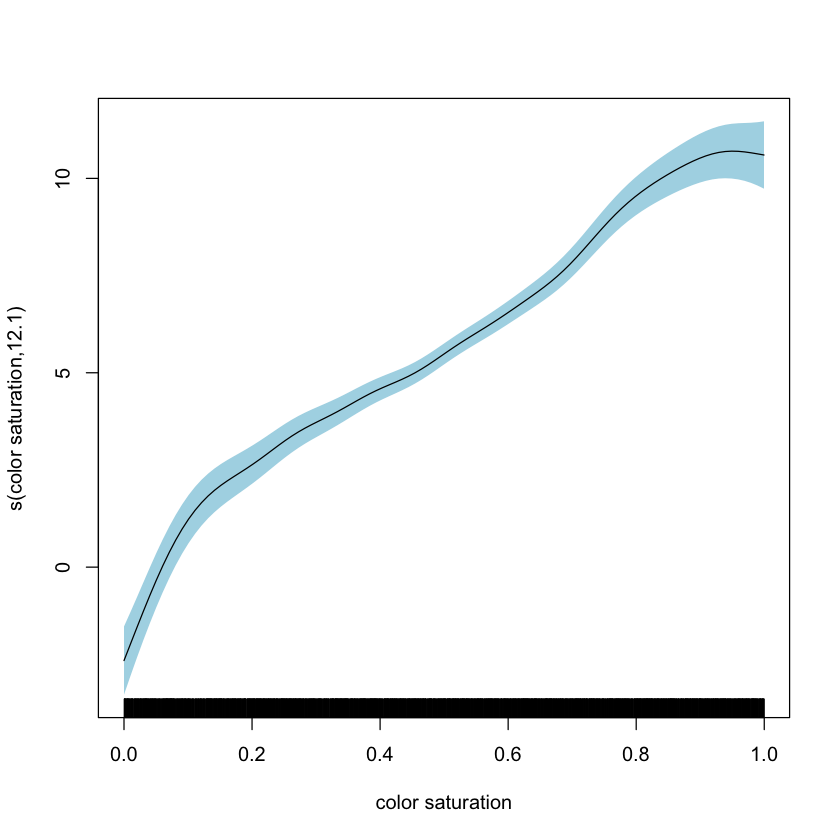

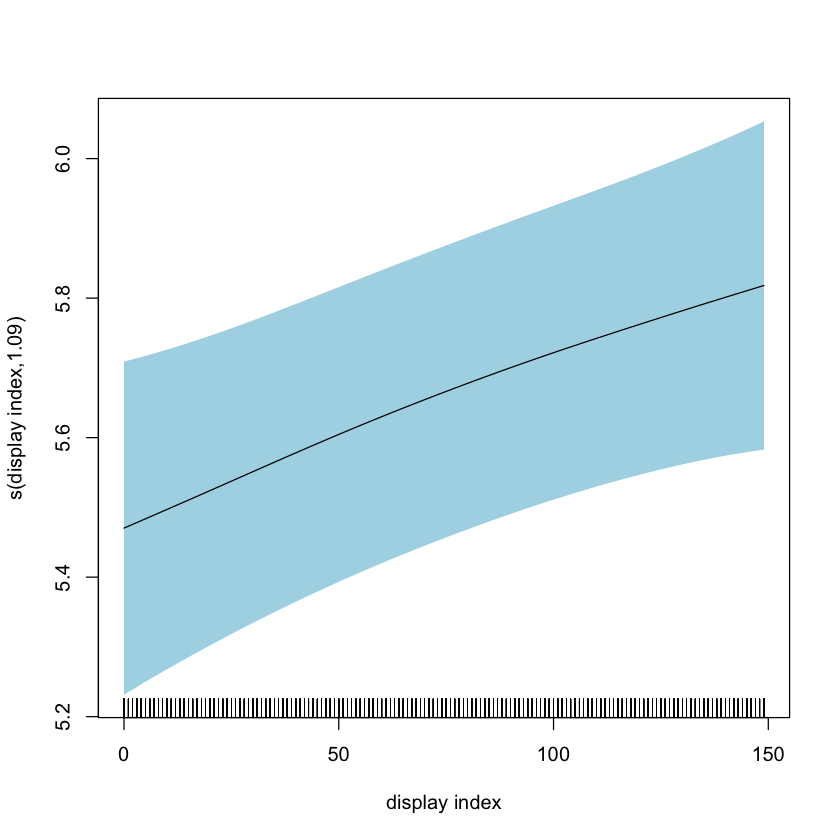

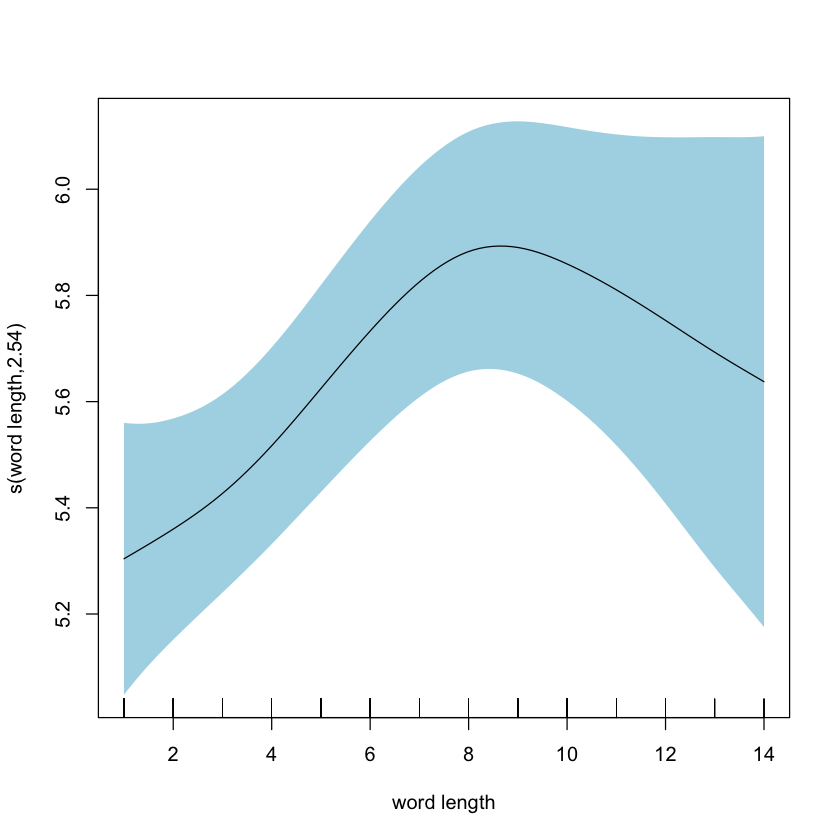

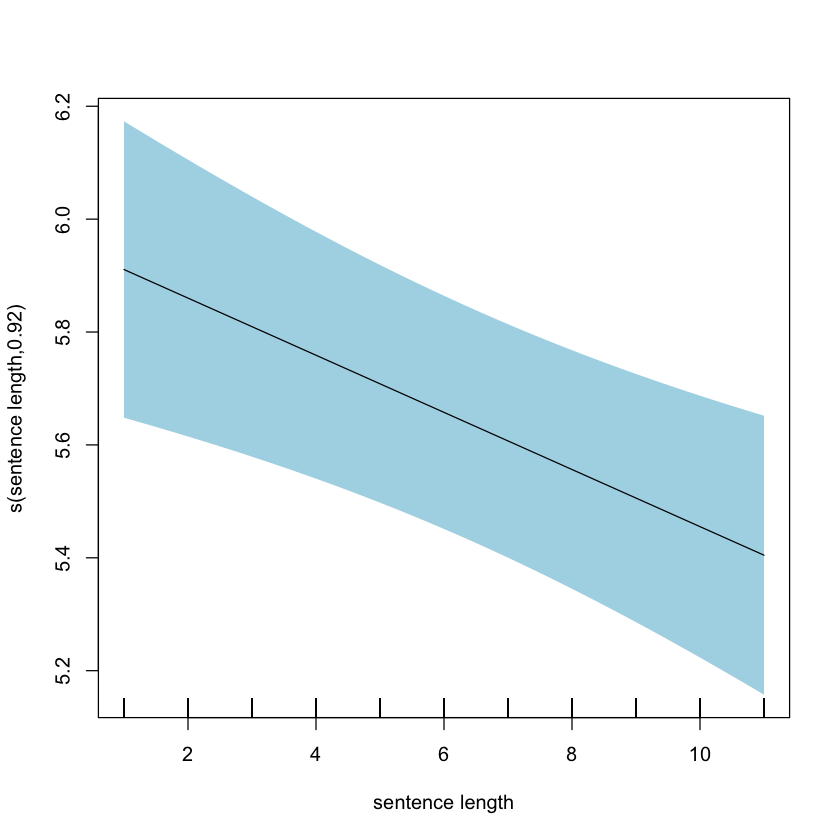

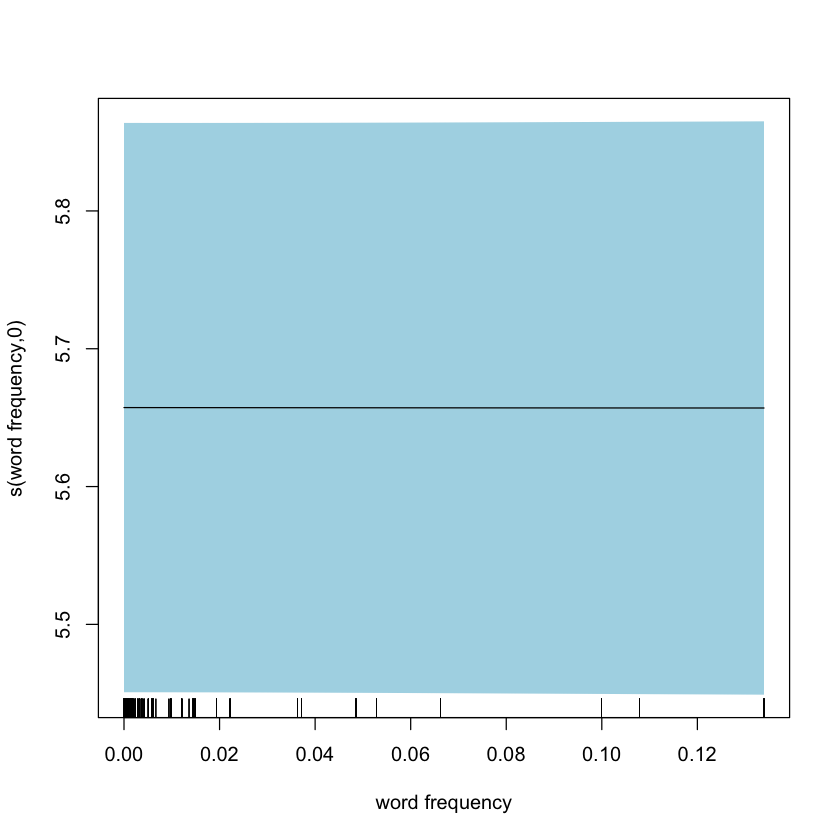

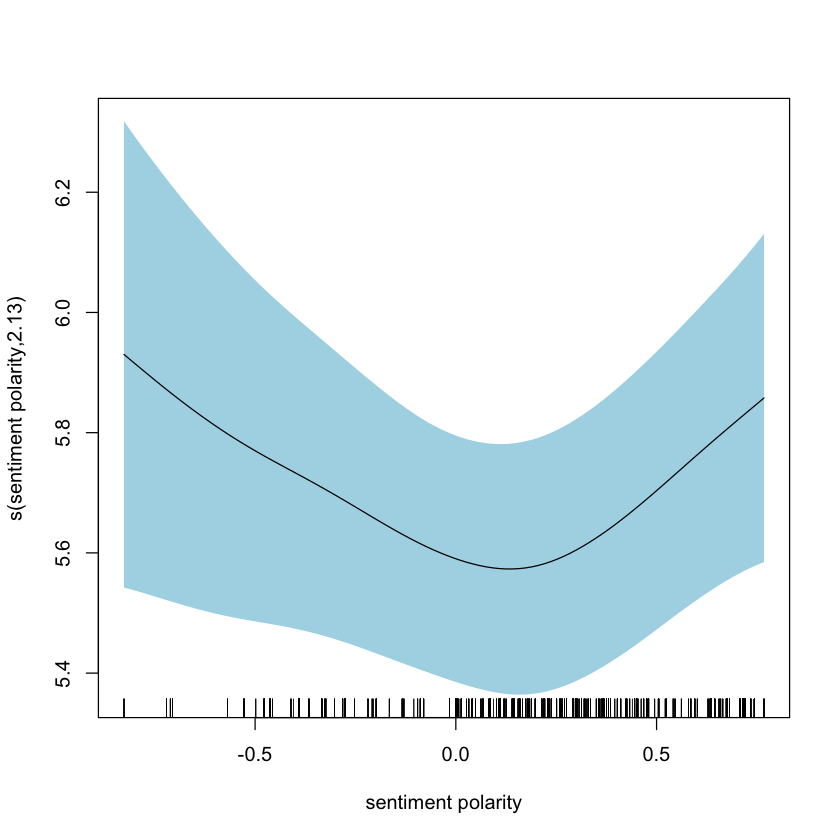

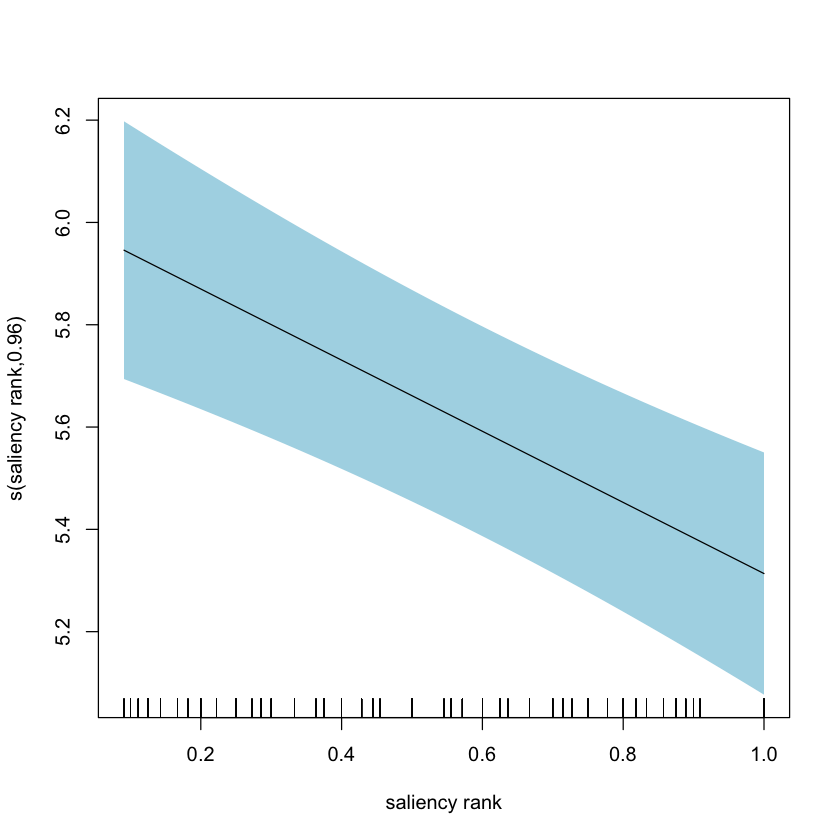

[1] "ti(saliency,display_index,2.51)"
[1] "color saturation"
[1] ""


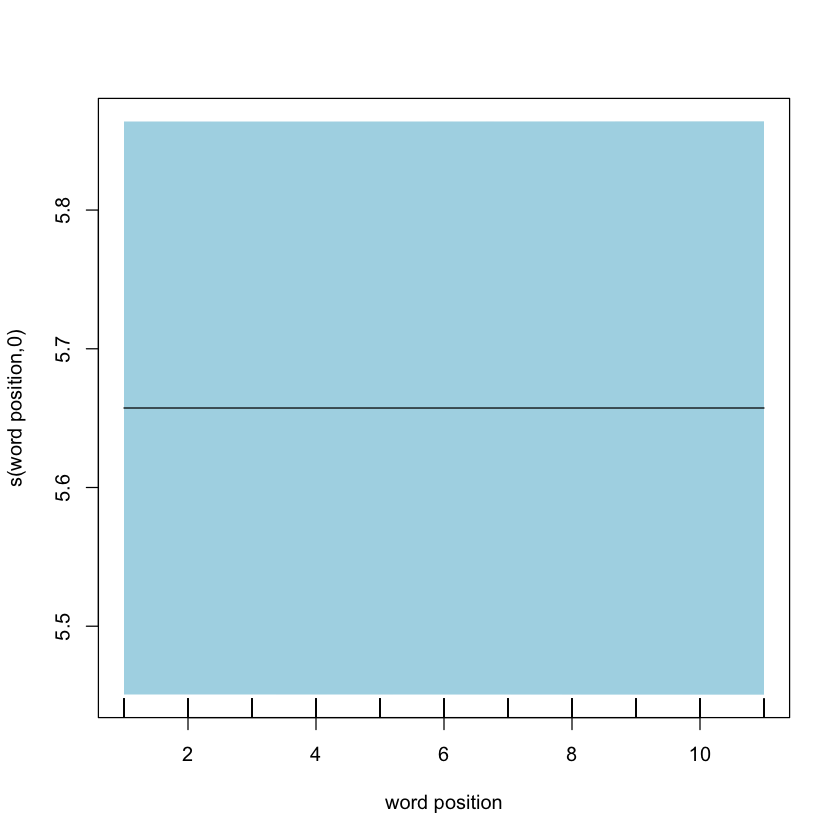

[1] "ti(saliency,word_length,6.06)"
[1] "color saturation"
[1] ""


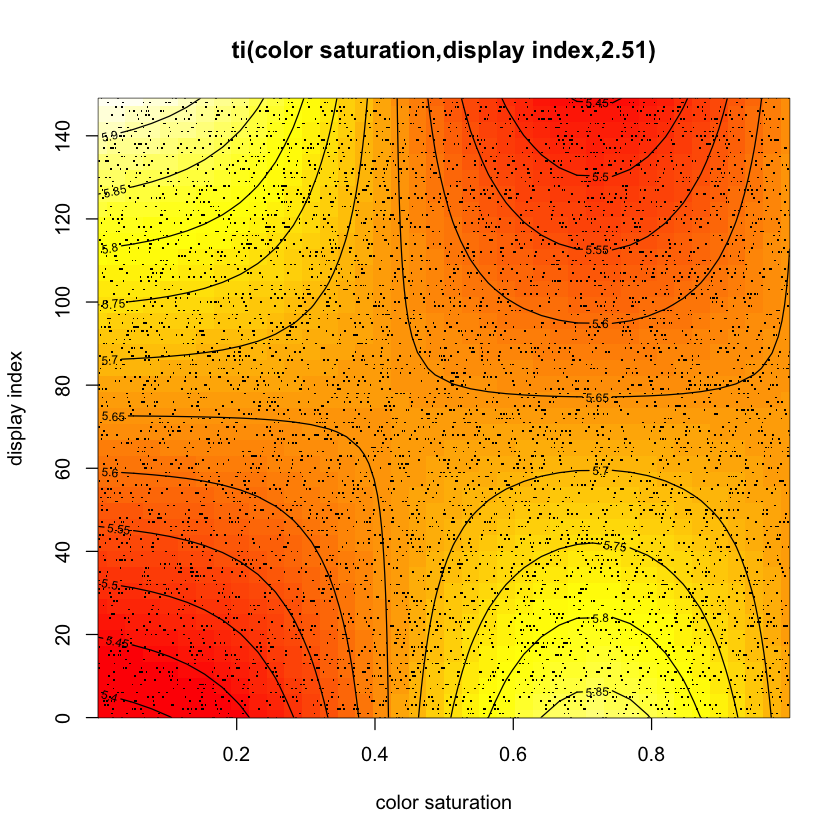

[1] "ti(saliency,sentence_length,3.16)"
[1] "color saturation"
[1] ""


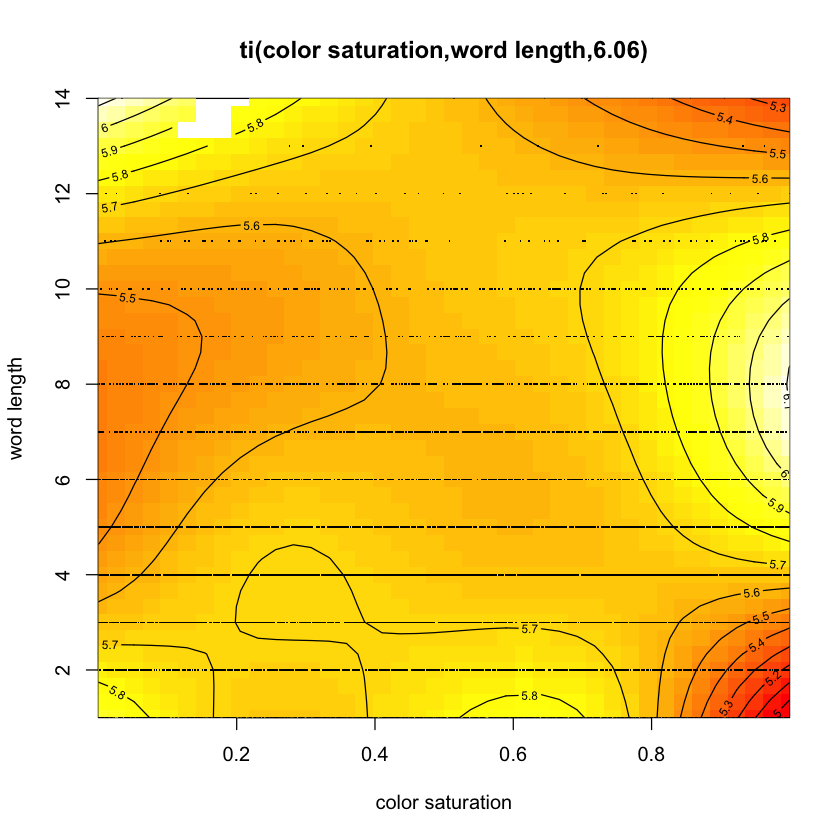

[1] "ti(saliency,relative_word_frequency,0.92)"
[1] "color saturation"
[1] ""


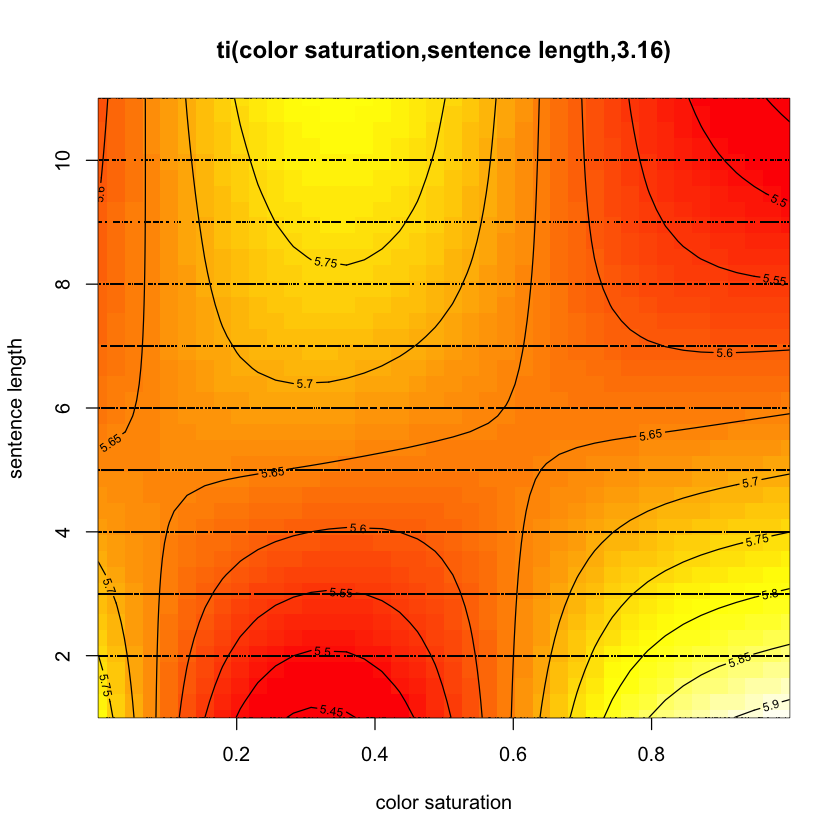

[1] "ti(saliency,lemma_polarity,2.94)"
[1] "color saturation"
[1] ""


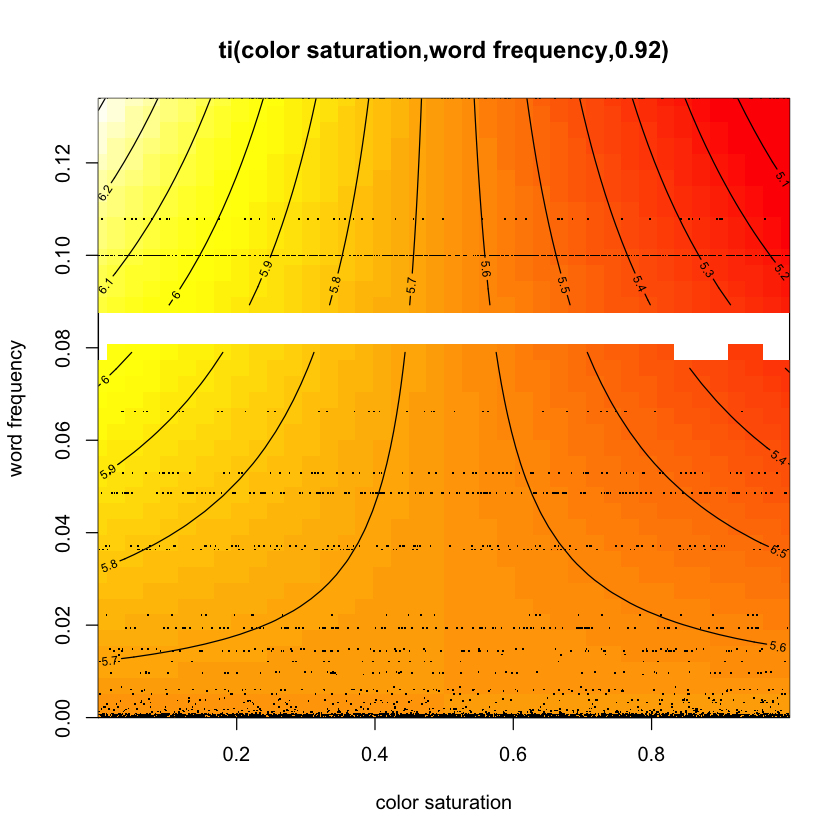

[1] "ti(saliency,normalized_saliency_rank,0)"
[1] "color saturation"
[1] ""


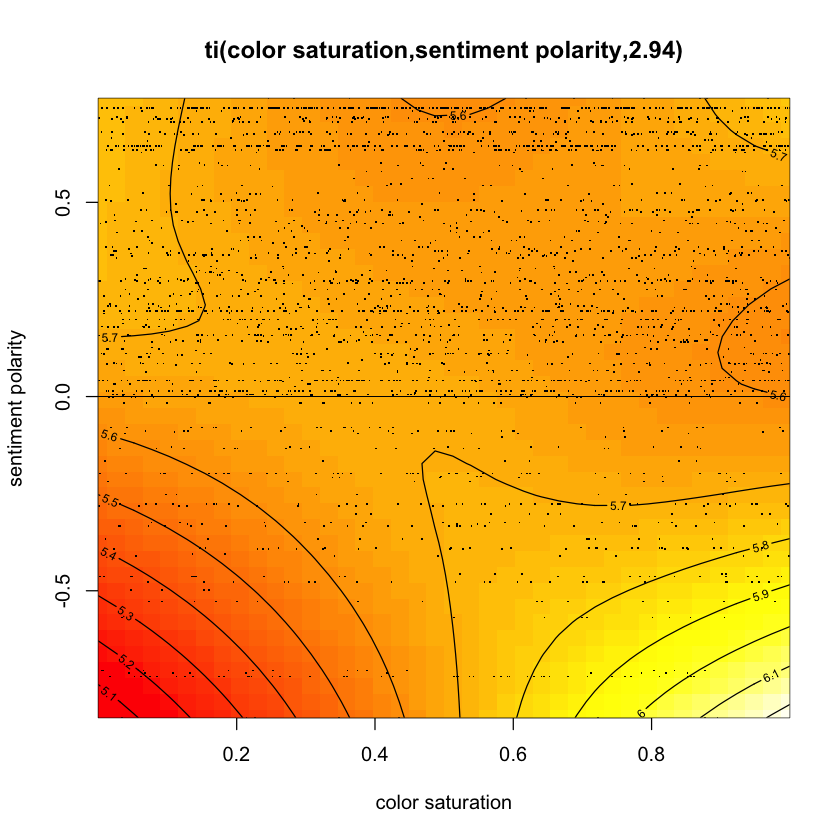

[1] "ti(saliency,word_position,0.63)"
[1] "color saturation"
[1] ""


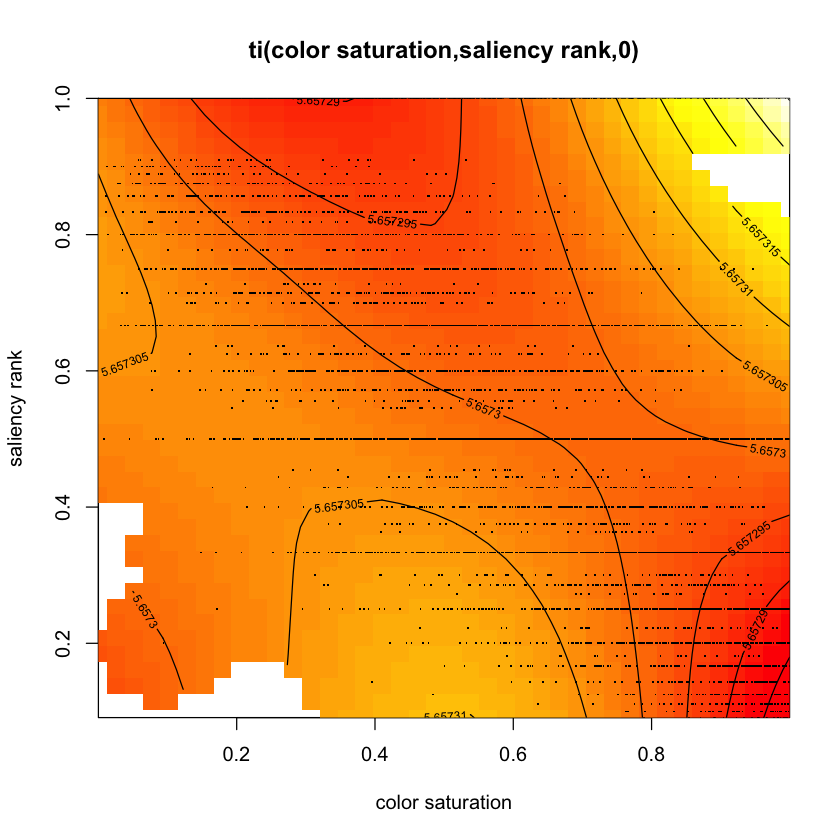

[1] "ti(display_index,word_length,1.51)"
[1] "display index"
[1] ""


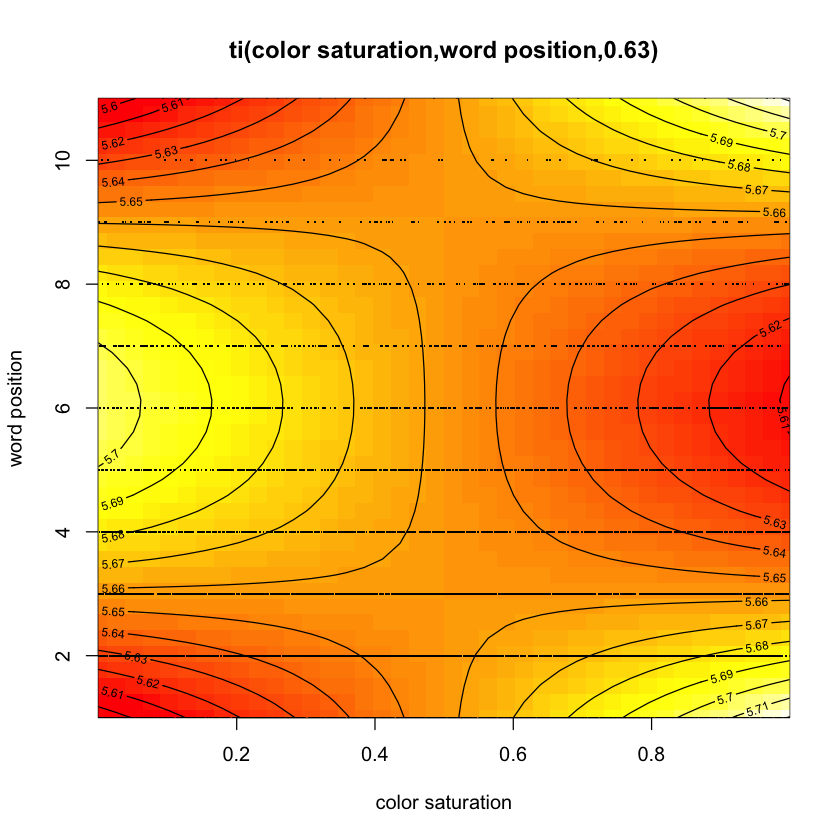

[1] "ti(display_index,sentence_length,1.28)"
[1] "display index"
[1] ""


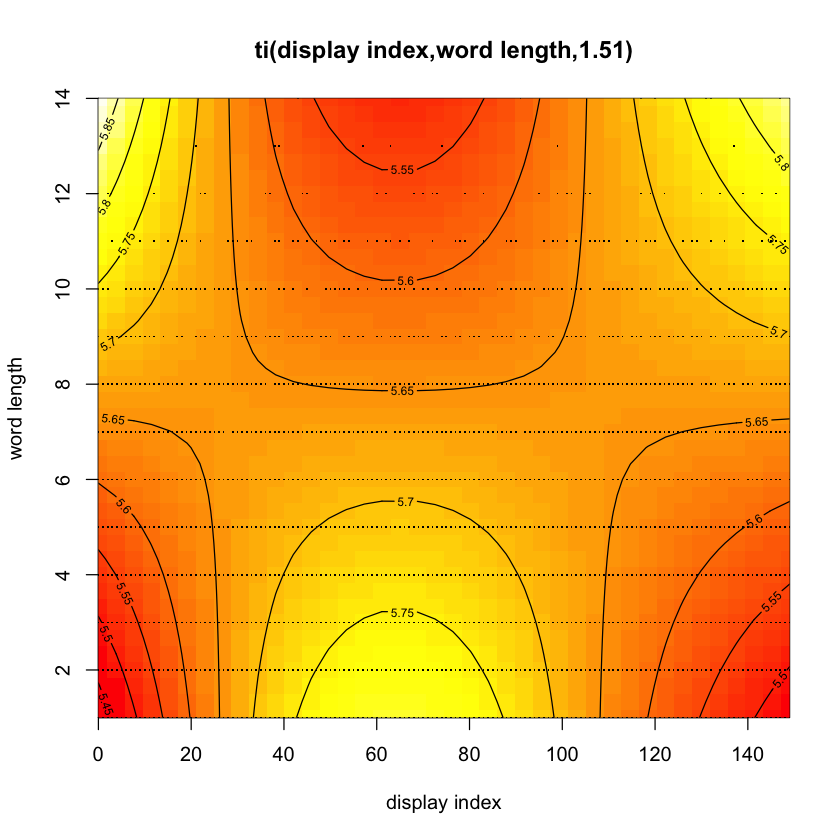

[1] "ti(display_index,relative_word_frequency,2.69)"
[1] "display index"
[1] ""


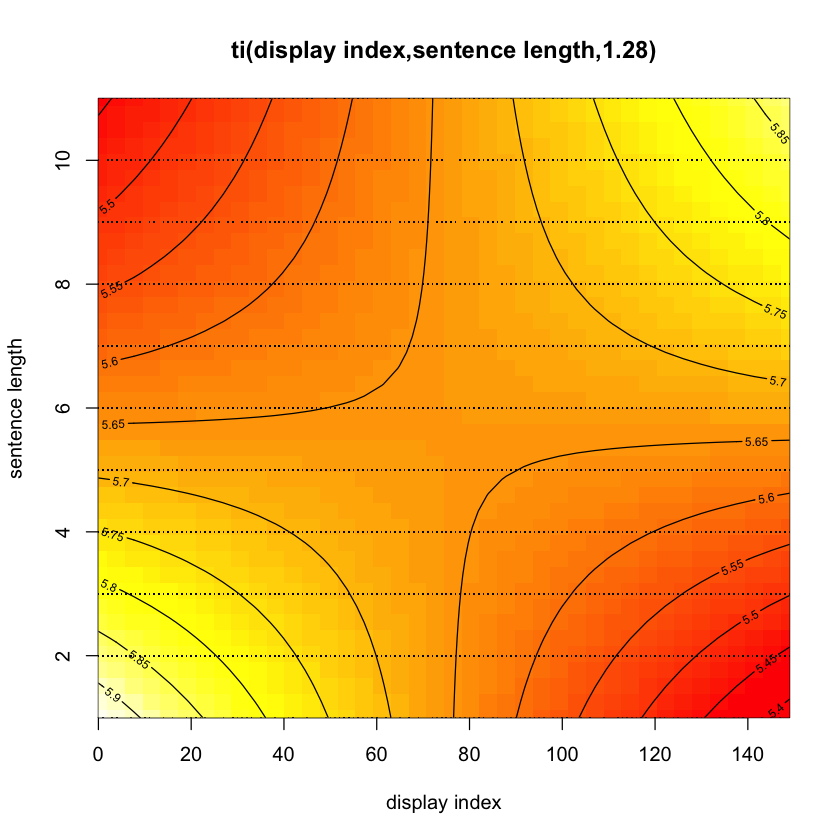

[1] "ti(display_index,lemma_polarity,0.54)"
[1] "display index"
[1] ""


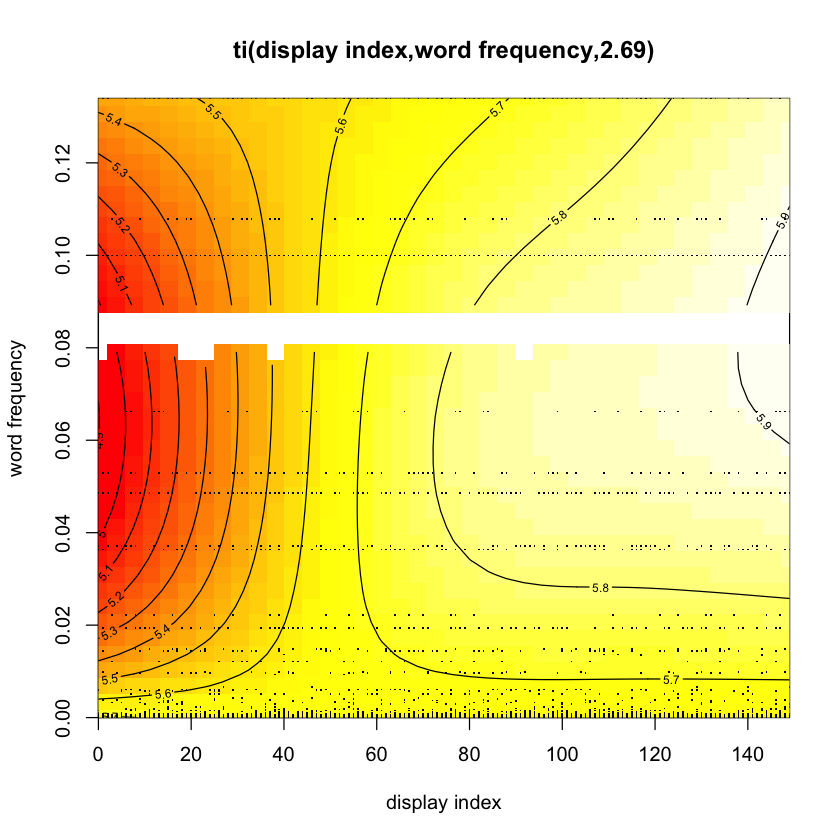

[1] "ti(display_index,normalized_saliency_rank,1.4)"
[1] "display index"
[1] ""


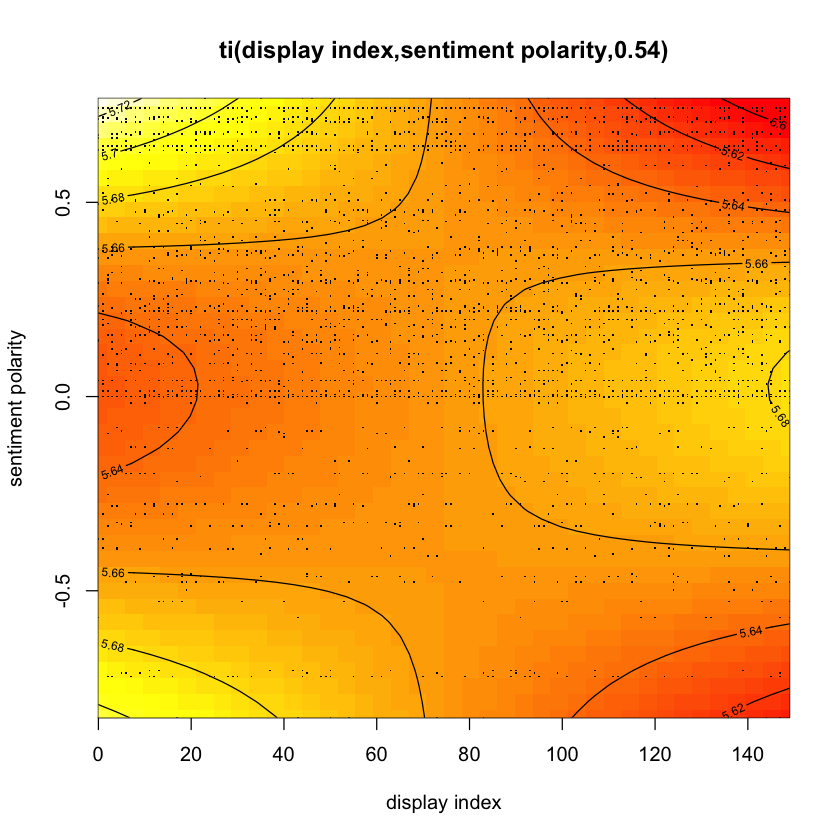

[1] "ti(display_index,word_position,3.36)"
[1] "display index"
[1] ""


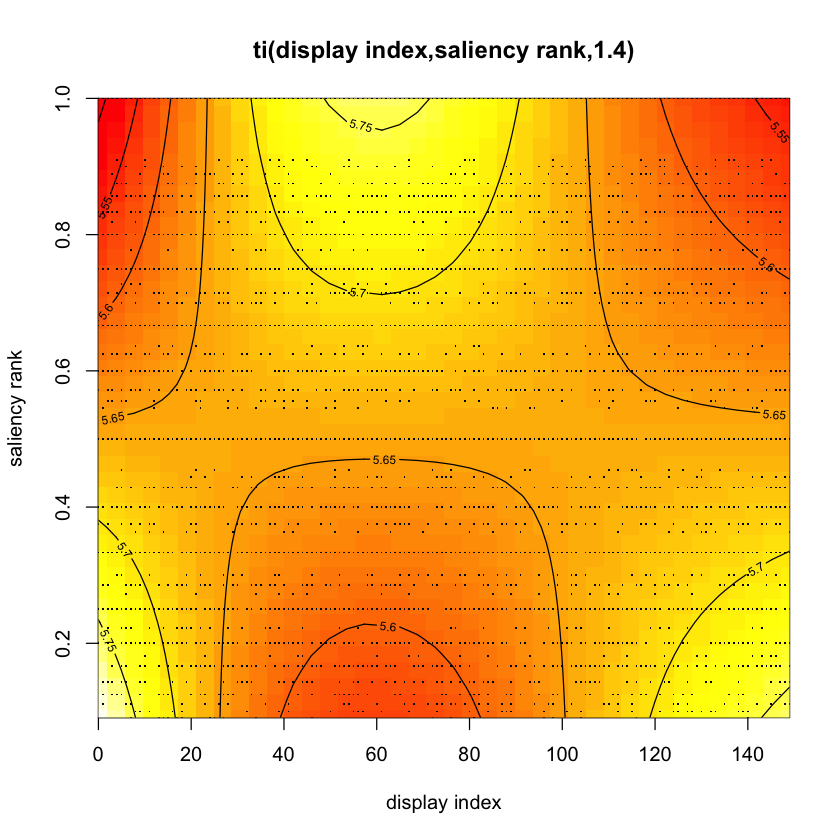

[1] "ti(word_length,sentence_length,0)"
[1] "word length"
[1] ""


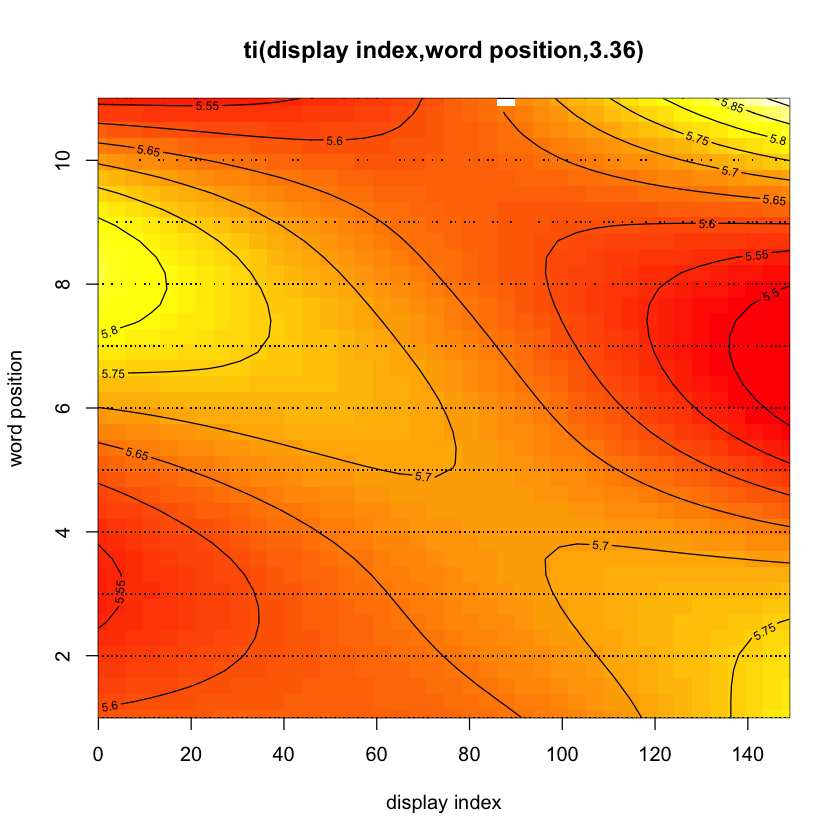

[1] "ti(word_length,relative_word_frequency,2.15)"
[1] "word length"
[1] ""


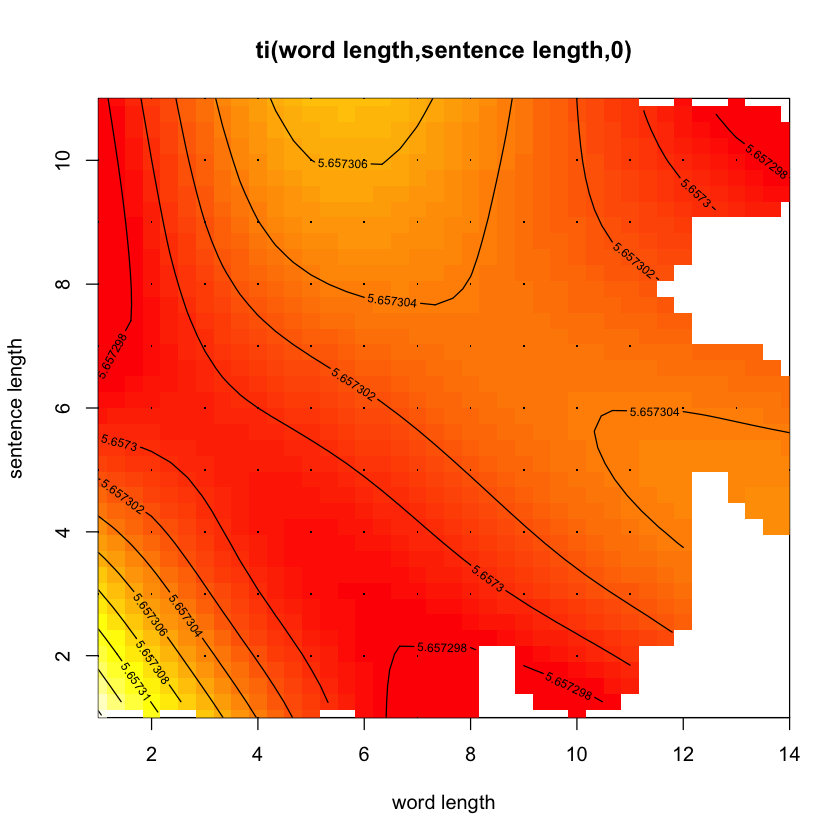

[1] "ti(word_length,lemma_polarity,0)"
[1] "word length"
[1] ""


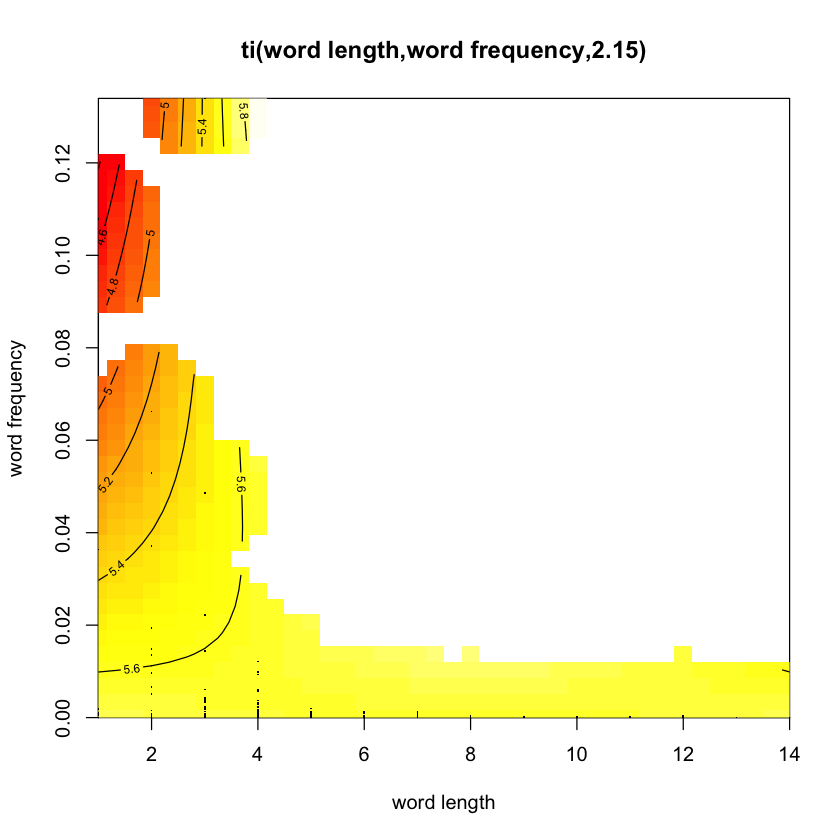

[1] "ti(word_length,normalized_saliency_rank,2.22)"
[1] "word length"
[1] ""


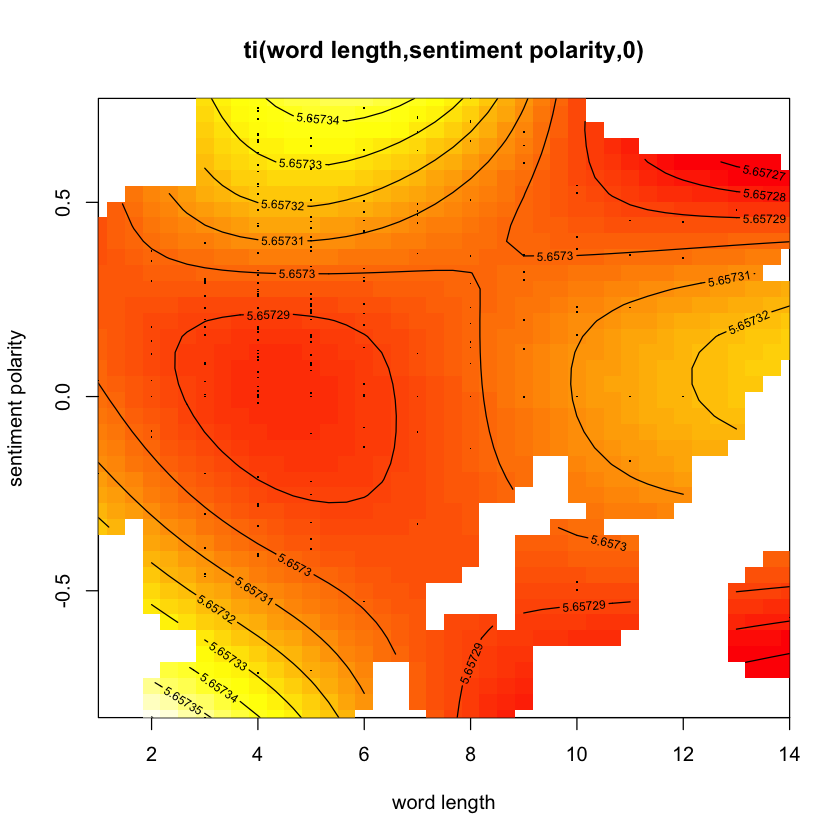

[1] "ti(word_length,word_position,1.03)"
[1] "word length"
[1] ""


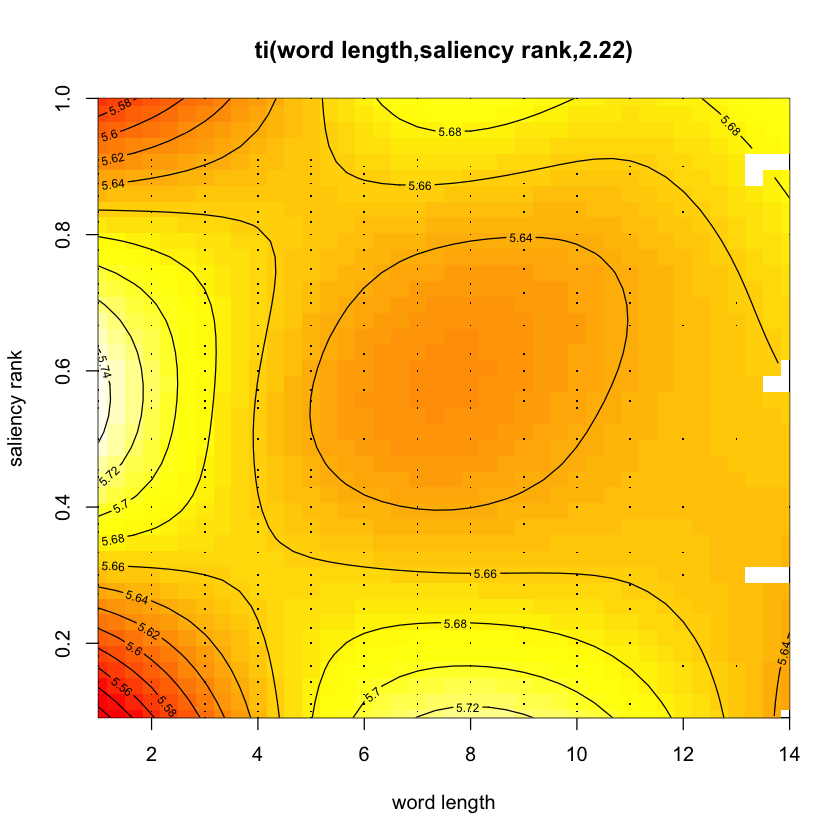

[1] "ti(sentence_length,relative_word_frequency,0)"
[1] "sentence length"
[1] ""


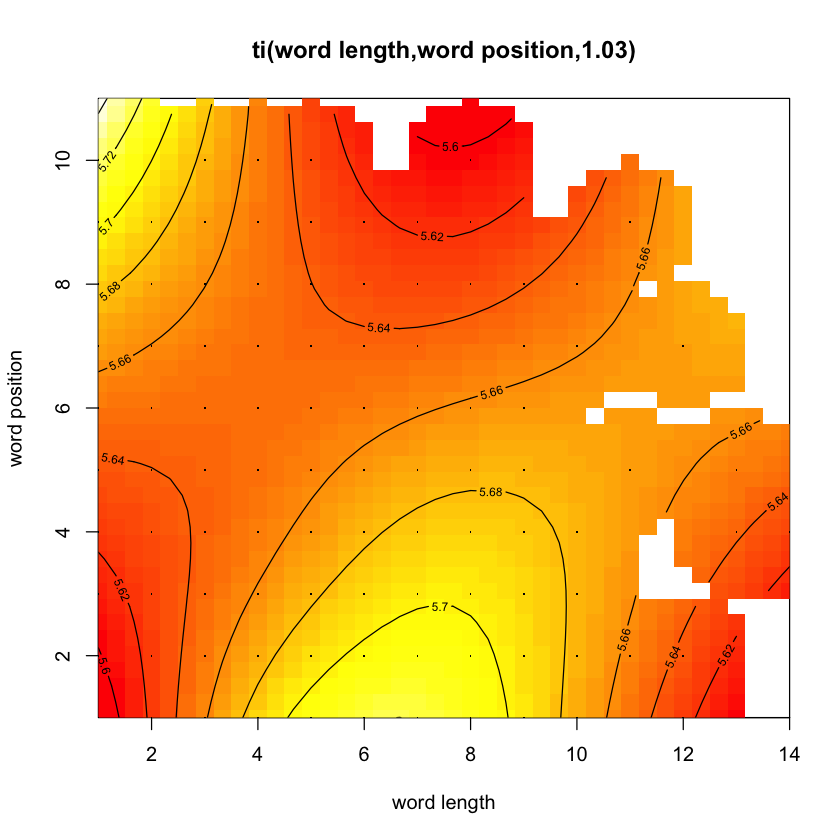

[1] "ti(sentence_length,lemma_polarity,0)"
[1] "sentence length"
[1] ""


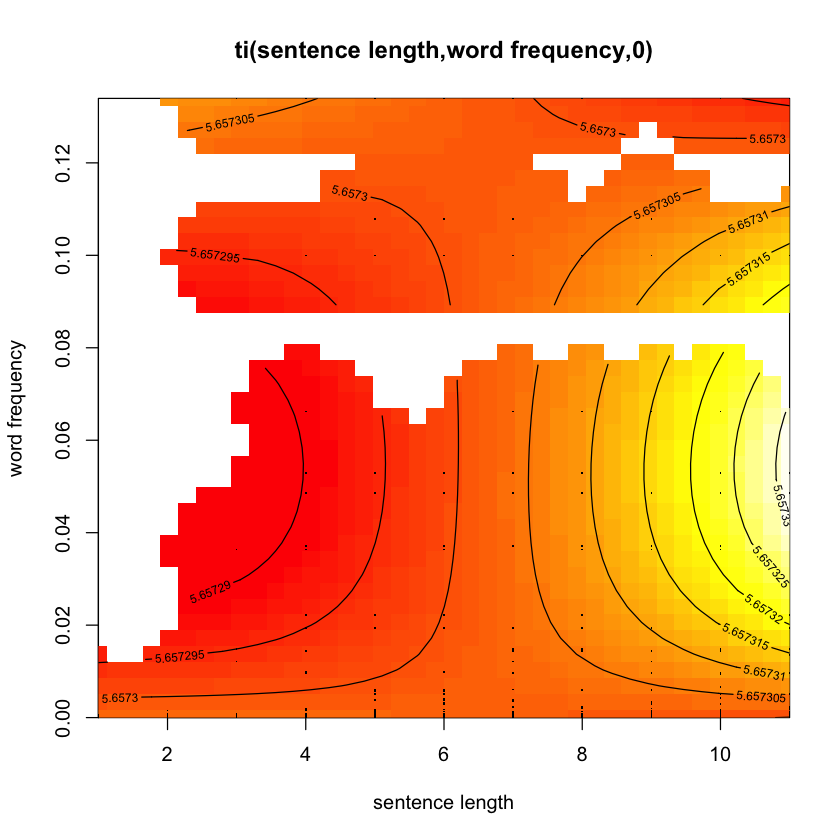

[1] "ti(sentence_length,normalized_saliency_rank,1.3)"
[1] "sentence length"
[1] ""


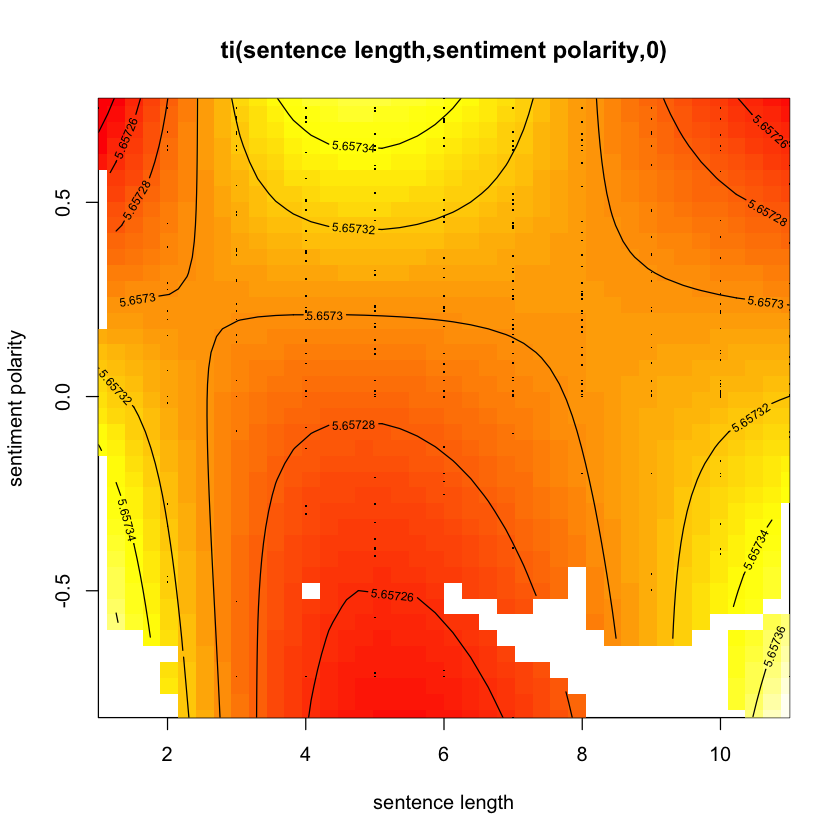

[1] "ti(sentence_length,word_position,3.2)"
[1] "sentence length"
[1] ""


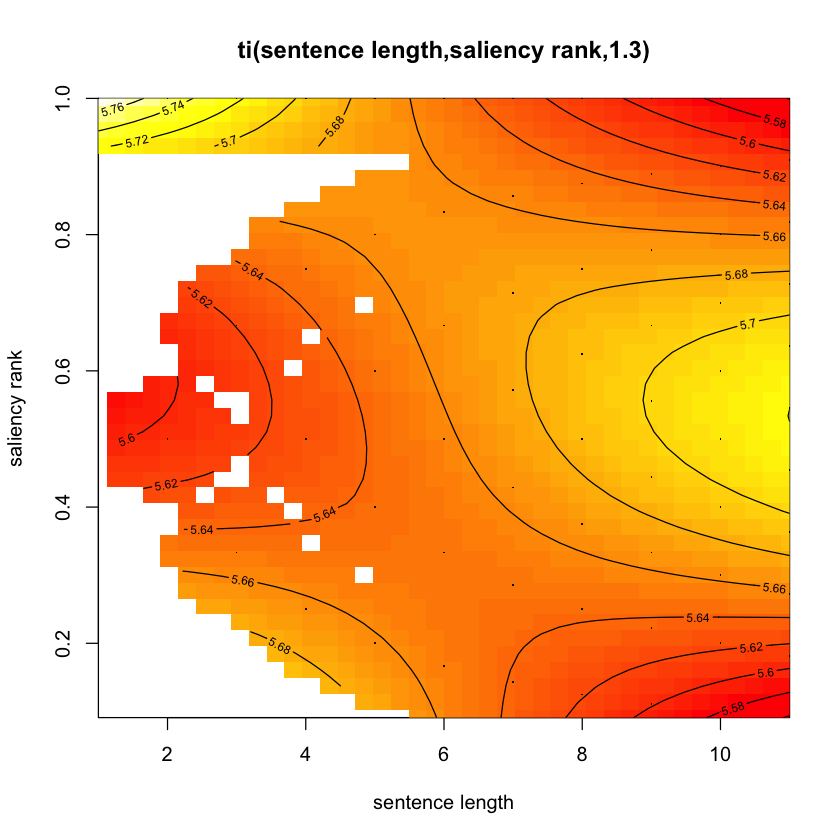

[1] "ti(relative_word_frequency,lemma_polarity,0)"
[1] "word frequency"
[1] ""


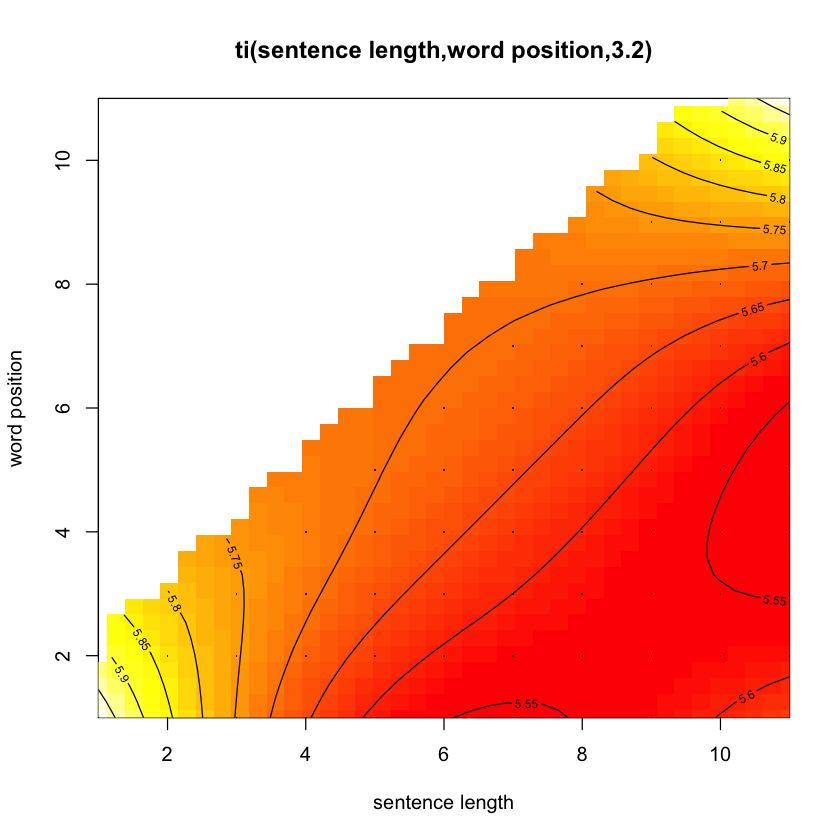

[1] "ti(relative_word_frequency,normalized_saliency_rank,0)"
[1] "word frequency"
[1] ""


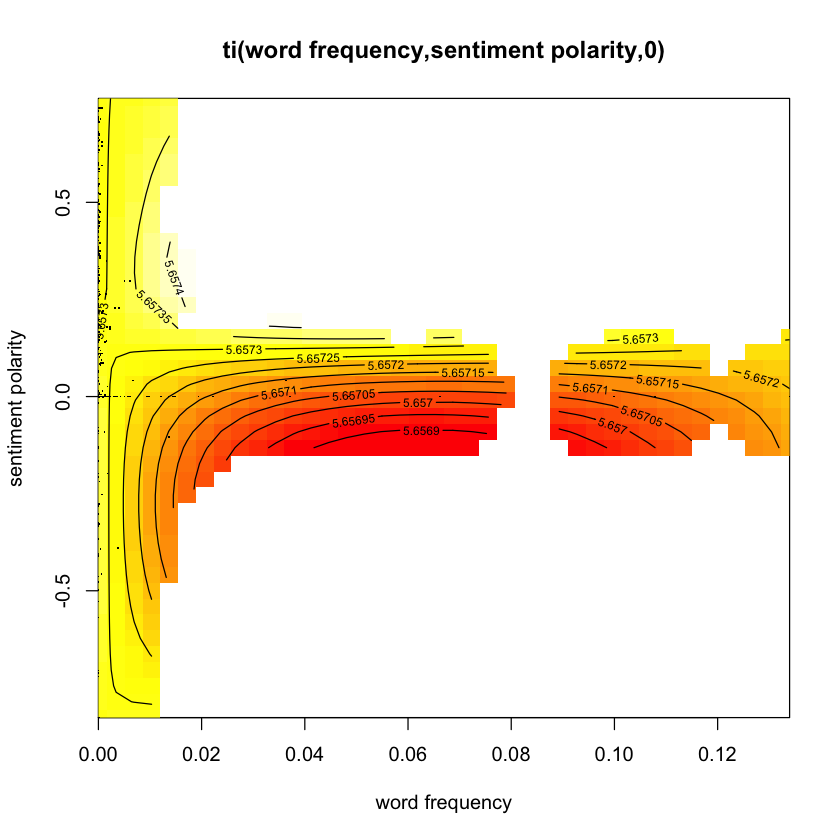

[1] "ti(relative_word_frequency,word_position,2.04)"
[1] "word frequency"
[1] ""


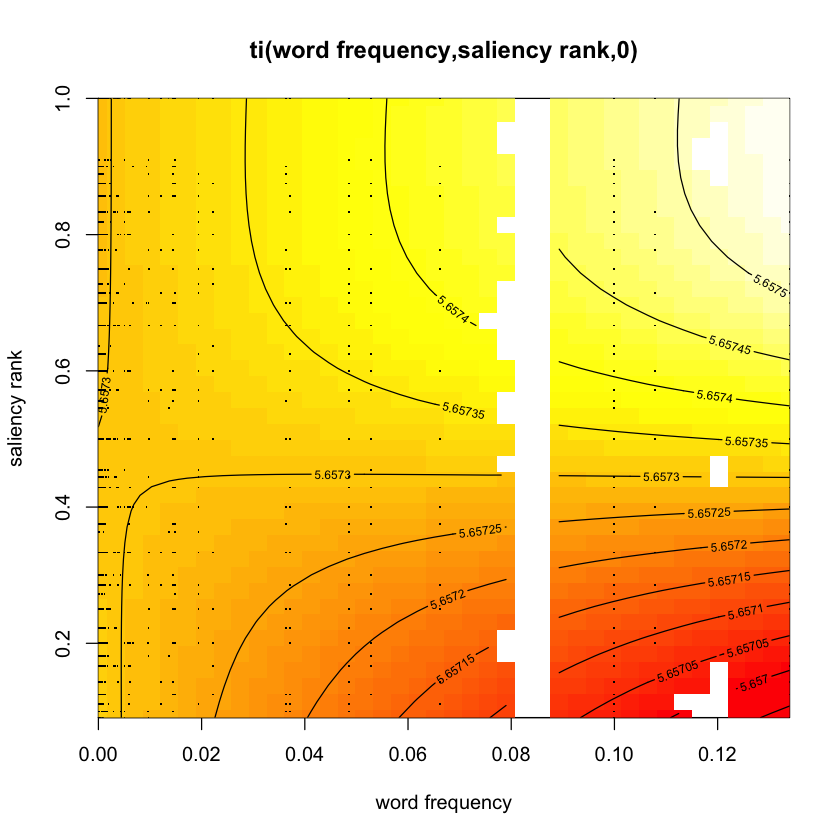

[1] "ti(lemma_polarity,normalized_saliency_rank,0)"
[1] "sentiment polarity"
[1] ""


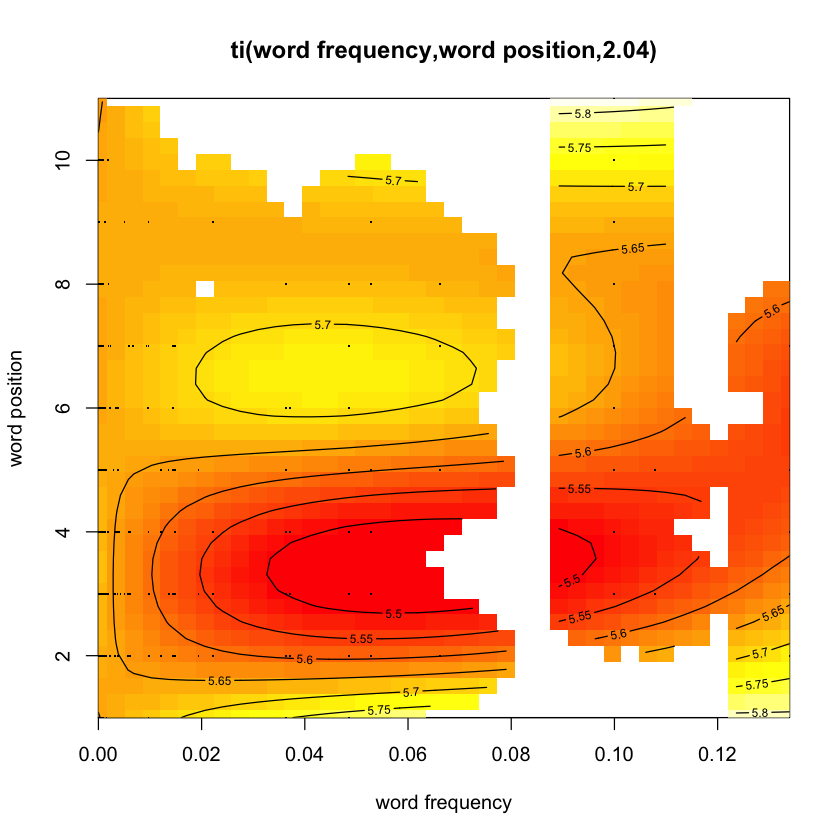

[1] "ti(lemma_polarity,word_position,0)"
[1] "sentiment polarity"
[1] ""


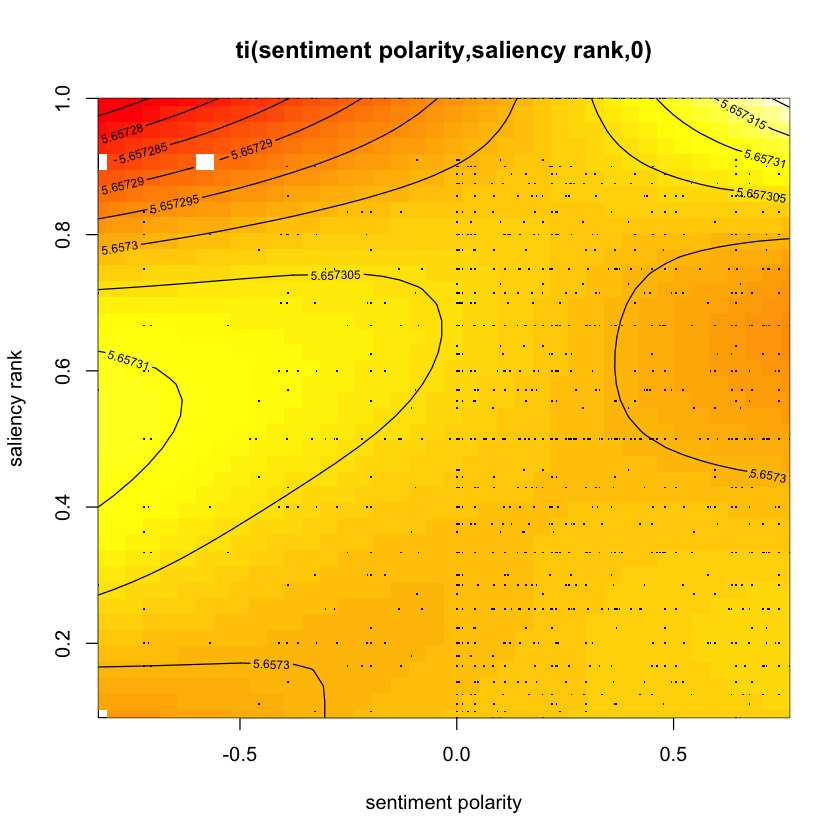

[1] "ti(normalized_saliency_rank,word_position,0)"
[1] "saliency rank"
[1] ""


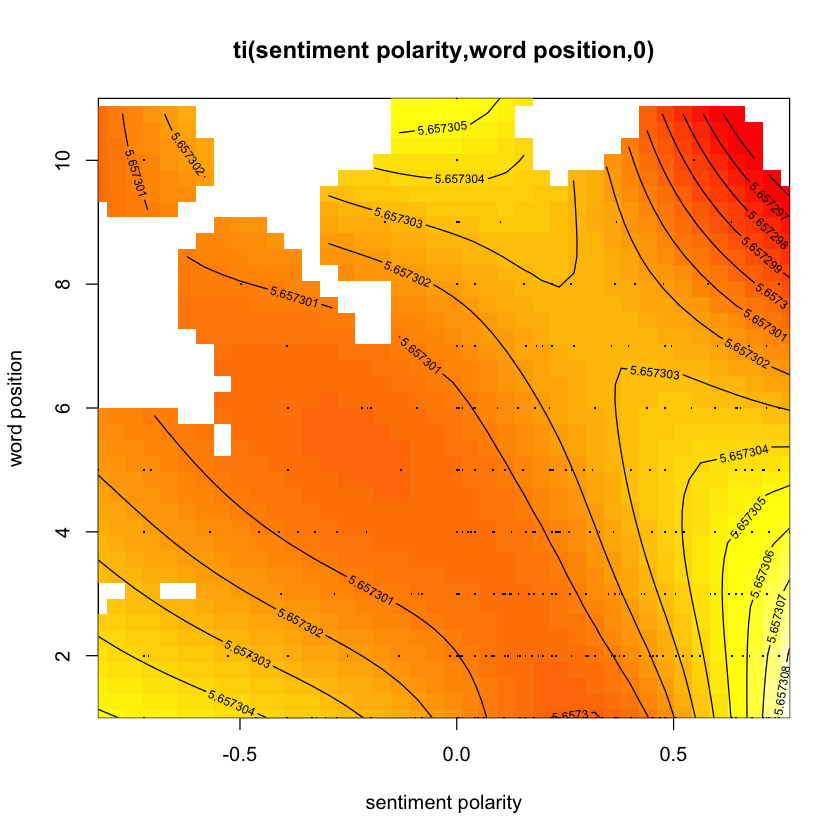

Warning message in plot.window(...):
“"contour.col" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"contour.col" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"contour.col" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"contour.col" is not a graphical parameter”
Warning message in box(...):
“"contour.col" is not a graphical parameter”
Warning message in title(...):
“"contour.col" is not a graphical parameter”


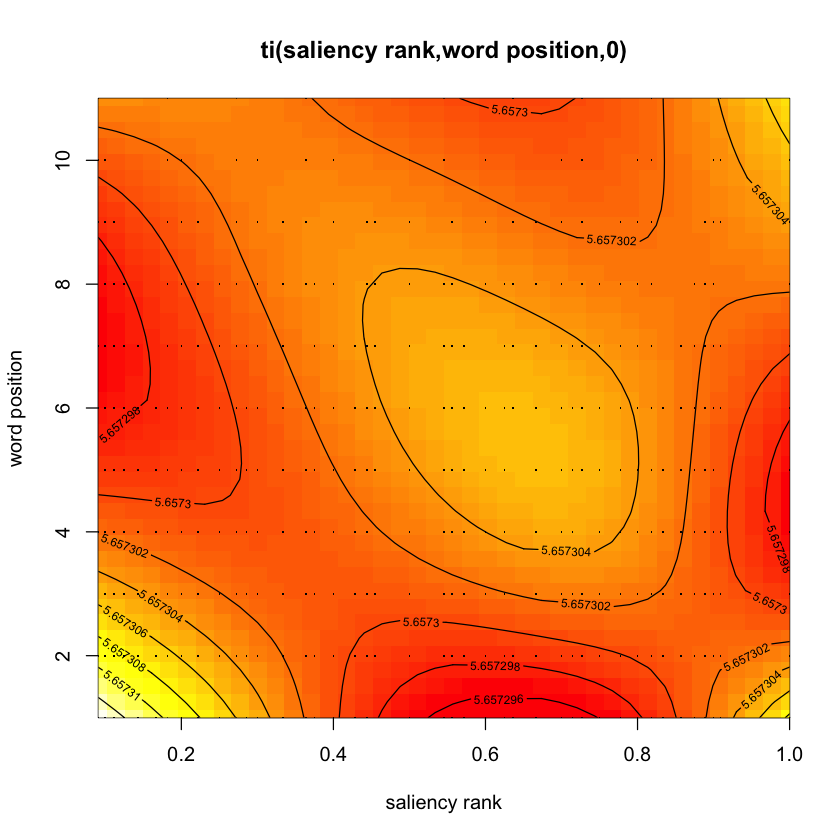

Warning message in plot.window(...):
“"contour.col" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"contour.col" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"contour.col" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"contour.col" is not a graphical parameter”
Warning message in box(...):
“"contour.col" is not a graphical parameter”
Warning message in title(...):
“"contour.col" is not a graphical parameter”
Warning message in doTryCatch(return(expr), name, parentenv, handler):
“"contour.col" is not a graphical parameter”
Warning message in doTryCatch(return(expr), name, parentenv, handler):
“"contour.col" is not a graphical parameter”
Warning message in doTryCatch(return(expr), name, parentenv, handler):
“"contour.col" is not a graphical parameter”
Warning message in doTryCatch(return(expr), name, parentenv, handler):
“"contour.col" is not a graphical

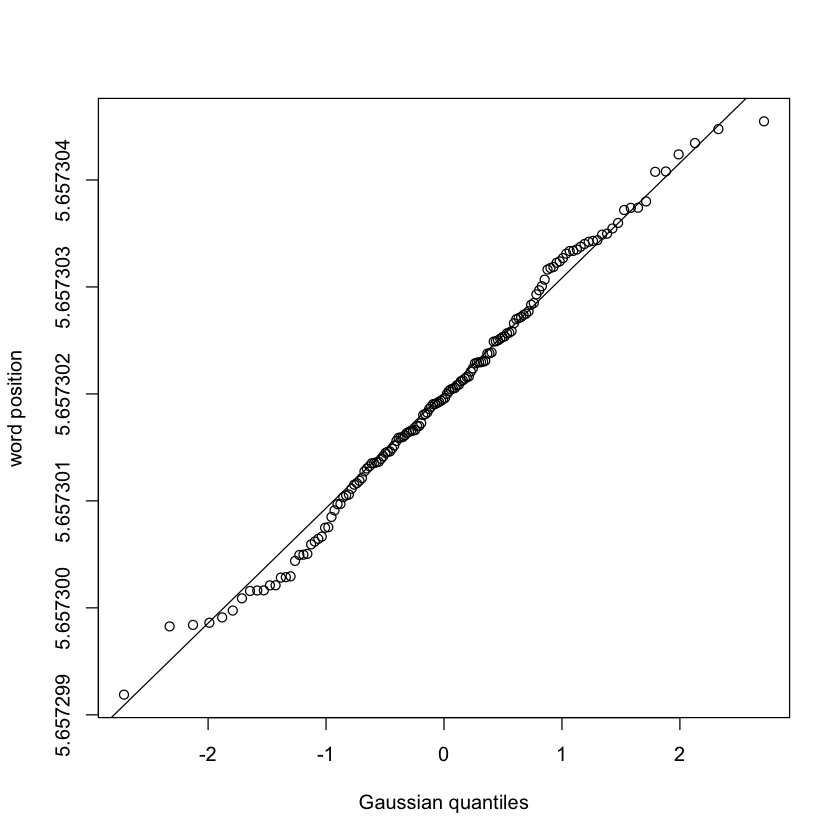

Warning message in plot.window(...):
“"contour.col" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"contour.col" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"contour.col" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"contour.col" is not a graphical parameter”
Warning message in box(...):
“"contour.col" is not a graphical parameter”
Warning message in title(...):
“"contour.col" is not a graphical parameter”
Warning message in doTryCatch(return(expr), name, parentenv, handler):
“"contour.col" is not a graphical parameter”
Warning message in doTryCatch(return(expr), name, parentenv, handler):
“"contour.col" is not a graphical parameter”
Warning message in doTryCatch(return(expr), name, parentenv, handler):
“"contour.col" is not a graphical parameter”
Warning message in doTryCatch(return(expr), name, parentenv, handler):
“"contour.col" is not a graphical

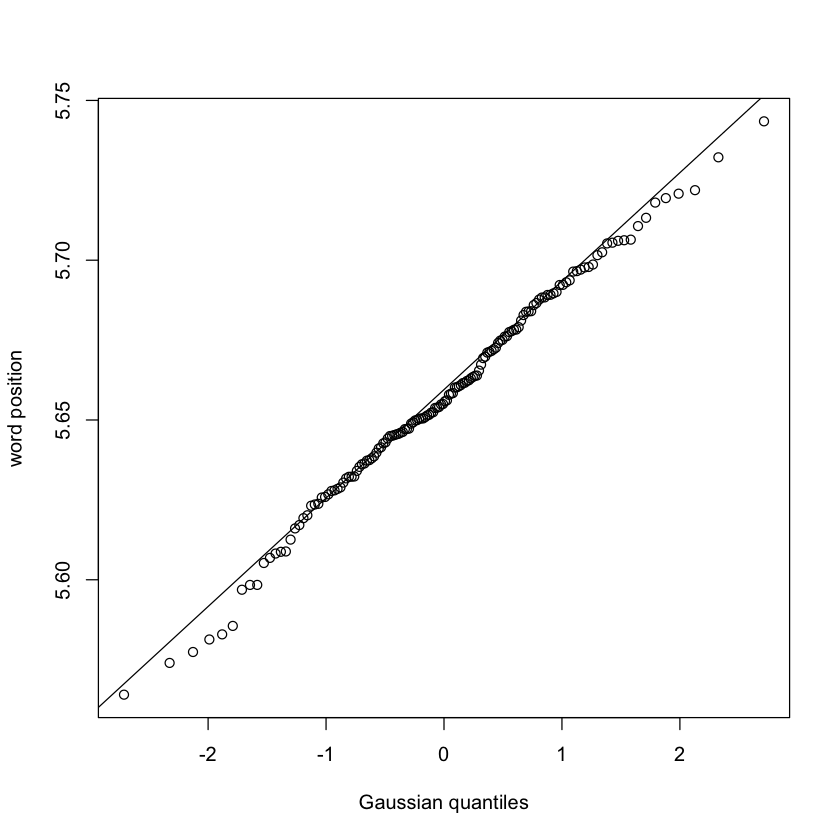

Warning message in plot.window(...):
“"contour.col" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"contour.col" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"contour.col" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"contour.col" is not a graphical parameter”
Warning message in box(...):
“"contour.col" is not a graphical parameter”
Warning message in title(...):
“"contour.col" is not a graphical parameter”


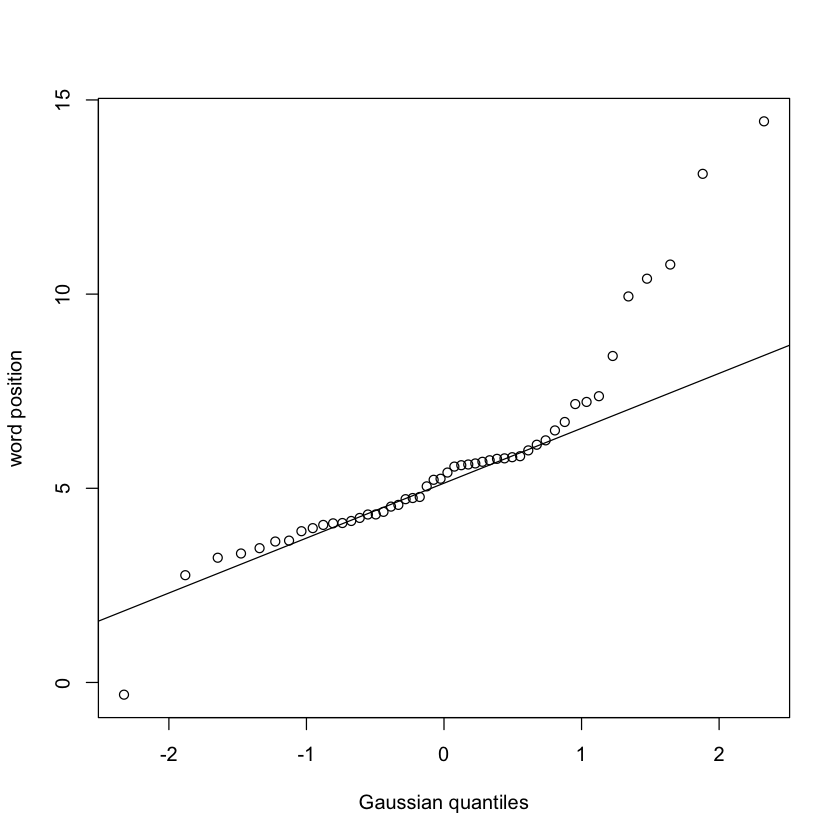

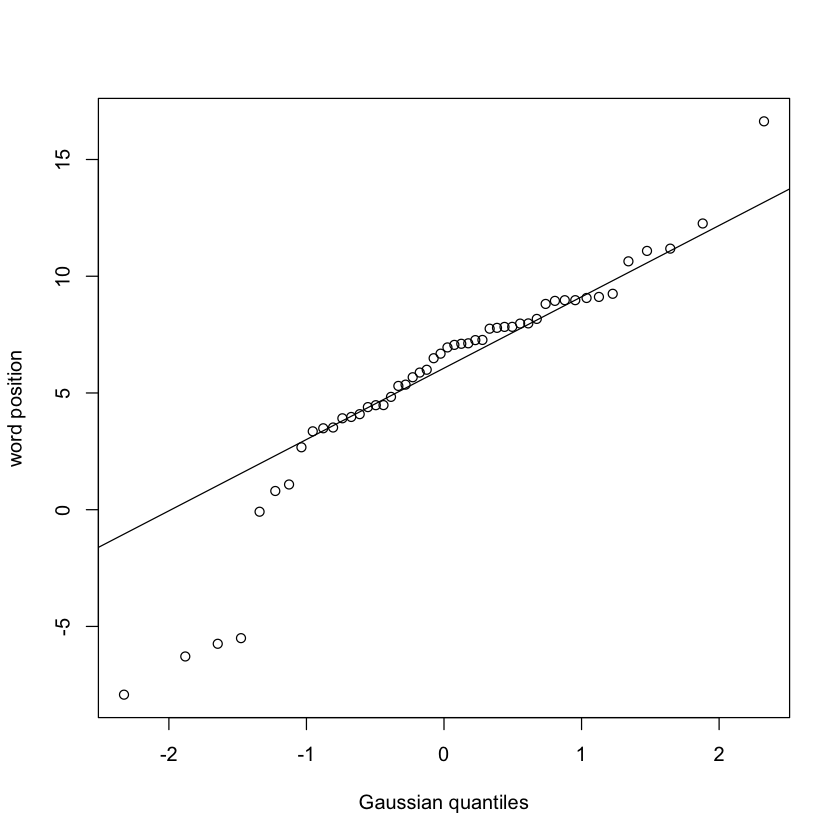

In [9]:
# Mappings from covariate names to what names should be plotted
covariates2plottitles <- hash() 
covariates2plottitles[["saliency"]] <- "color saturation"
covariates2plottitles[["word_length"]] <- "word length"
covariates2plottitles[["display_index"]] <- "display index"
covariates2plottitles[["sentence_length"]] <- "sentence length"
covariates2plottitles[["relative_word_frequency"]] <- "word frequency"
covariates2plottitles[["lemma_polarity"]] <- "sentiment polarity"
covariates2plottitles[["normalized_saliency_rank"]] <- "saliency rank"
covariates2plottitles[["word_position"]] <- "word position"


for (i in 1:length(all_plots)) {
    extracted_y_label_stem <- str_replace(str_split(all_plots[[i]]$ylab, ",")[[1]], "\\(", "_")[[1]]
    extracted_y_covariate <- str_replace(extracted_y_label_stem, "^s_", "")
    if(!is.null(covariates2plottitles[[extracted_y_covariate]])){
         new_y_label <- str_replace(all_plots[[i]]$ylab, extracted_y_covariate, covariates2plottitles[[extracted_y_covariate]])   
    }    
    
    if(is.null(all_plots[[i]]$main) || is.null(covariates2plottitles[[extracted_y_covariate]])){
        new_title <- ""
    }
    else{
        print(all_plots[[i]]$main)
        print(covariates2plottitles[[all_plots[[i]]$xlab]])
        print("")
        new_title <- str_replace(all_plots[[i]]$main, all_plots[[i]]$xlab, covariates2plottitles[[all_plots[[i]]$xlab]])
        new_title <- str_replace(new_title, extracted_y_covariate, covariates2plottitles[[extracted_y_covariate]])
    }
    

    tmp_plot <- plot(model,
        select=i,
        pages = 0,
        rug = TRUE,
        residuals = FALSE,
        shade = TRUE,
        shade.col = "lightblue",
        seWithMean = TRUE,
        shift=shift,
        scale=0,
        all.terms = TRUE,
        scheme = 2,
        contour.col = "black",
        main=new_title,
        xlab=covariates2plottitles[[all_plots[[i]]$xlab]],
        ylab=new_y_label
        )
}


[1] "display_index"
[1] "saliency"
Summary:
	* capitalization : factor; set to the value(s): other. 
	* dependency_relation : factor; set to the value(s): root. 
	* saliency : numeric predictor; with 30 values ranging from 0.000002 to 0.999604. 
	* display_index : numeric predictor; with 30 values ranging from 0.000000 to 149.000000. 
	* word_length : numeric predictor; set to the value(s): 4. 
	* sentence_length : numeric predictor; set to the value(s): 5. 
	* relative_word_frequency : numeric predictor; set to the value(s): 8.30442783686542e-05. 
	* lemma_polarity : numeric predictor; set to the value(s): 0. 
	* normalized_saliency_rank : numeric predictor; set to the value(s): 0.636363636363636. 
	* word_position : numeric predictor; set to the value(s): 3. 
	* sentence_id : factor; set to the value(s): reviews-001325-0002. 
	* worker_id : factor; set to the value(s): 8cb2a64783a11131878e1cc3d8838ccd3fb7db330415ee0af6334dde3a603dc9. 
[1] "word_length"
[1] "saliency"
Summary:
	* capi

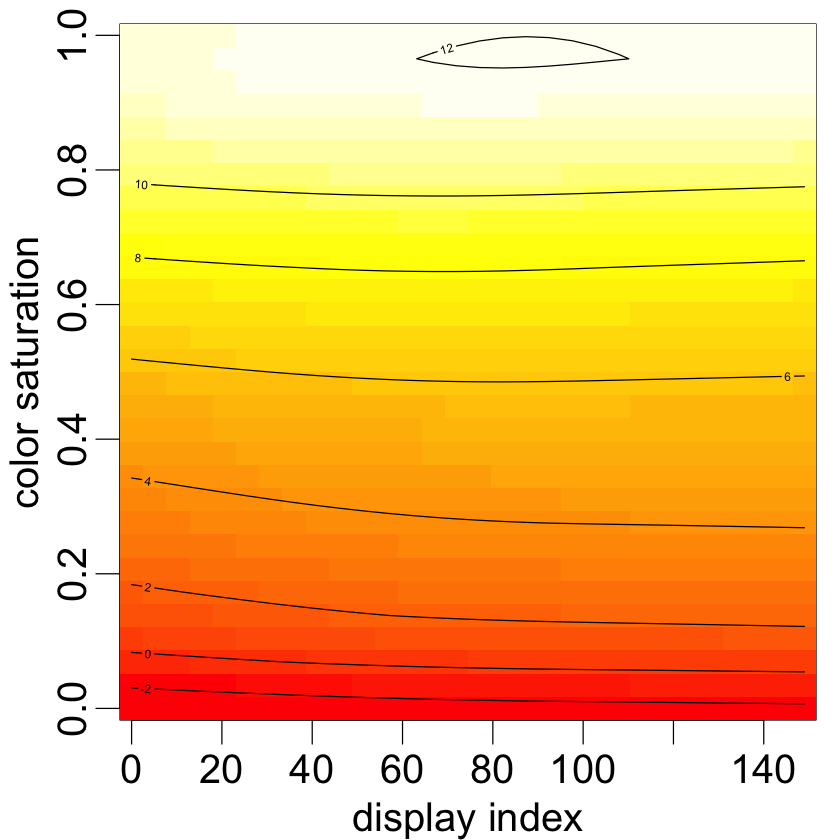

[1] "word_length"
[1] "display_index"
Summary:
	* capitalization : factor; set to the value(s): other. 
	* dependency_relation : factor; set to the value(s): root. 
	* saliency : numeric predictor; set to the value(s): 0.507935727055296. 
	* display_index : numeric predictor; with 30 values ranging from 0.000000 to 149.000000. 
	* word_length : numeric predictor; with 30 values ranging from 1.000000 to 14.000000. 
	* sentence_length : numeric predictor; set to the value(s): 5. 
	* relative_word_frequency : numeric predictor; set to the value(s): 8.30442783686542e-05. 
	* lemma_polarity : numeric predictor; set to the value(s): 0. 
	* normalized_saliency_rank : numeric predictor; set to the value(s): 0.636363636363636. 
	* word_position : numeric predictor; set to the value(s): 3. 
	* sentence_id : factor; set to the value(s): reviews-001325-0002. 
	* worker_id : factor; set to the value(s): 8cb2a64783a11131878e1cc3d8838ccd3fb7db330415ee0af6334dde3a603dc9. 


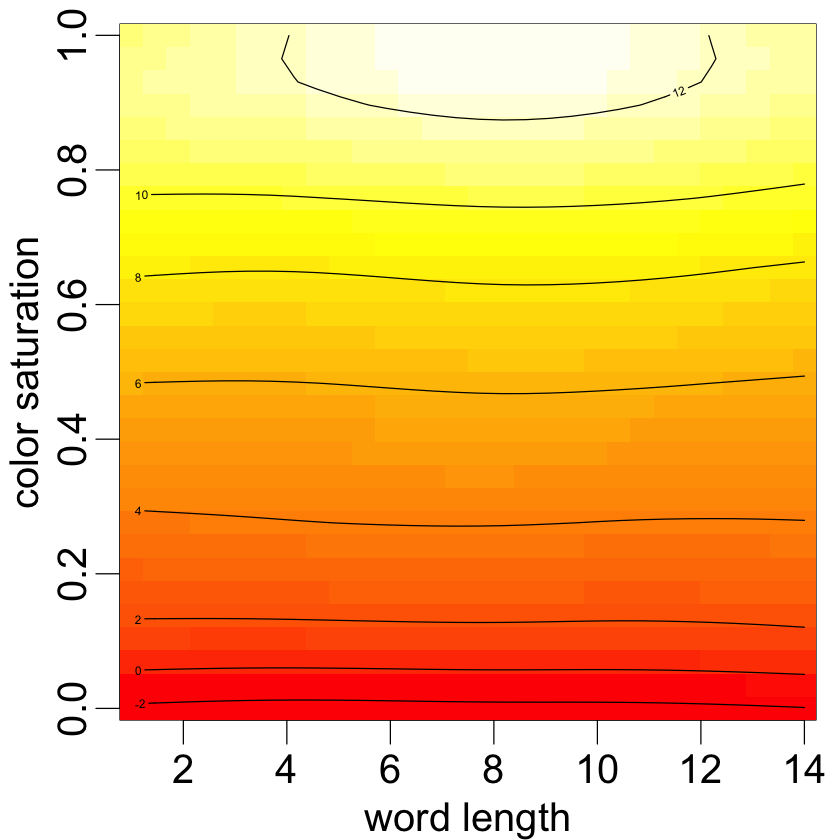

[1] "sentence_length"
[1] "saliency"
Summary:
	* capitalization : factor; set to the value(s): other. 
	* dependency_relation : factor; set to the value(s): root. 
	* saliency : numeric predictor; with 30 values ranging from 0.000002 to 0.999604. 
	* display_index : numeric predictor; set to the value(s): 75. 
	* word_length : numeric predictor; set to the value(s): 4. 
	* sentence_length : numeric predictor; with 30 values ranging from 1.000000 to 11.000000. 
	* relative_word_frequency : numeric predictor; set to the value(s): 8.30442783686542e-05. 
	* lemma_polarity : numeric predictor; set to the value(s): 0. 
	* normalized_saliency_rank : numeric predictor; set to the value(s): 0.636363636363636. 
	* word_position : numeric predictor; set to the value(s): 3. 
	* sentence_id : factor; set to the value(s): reviews-001325-0002. 
	* worker_id : factor; set to the value(s): 8cb2a64783a11131878e1cc3d8838ccd3fb7db330415ee0af6334dde3a603dc9. 


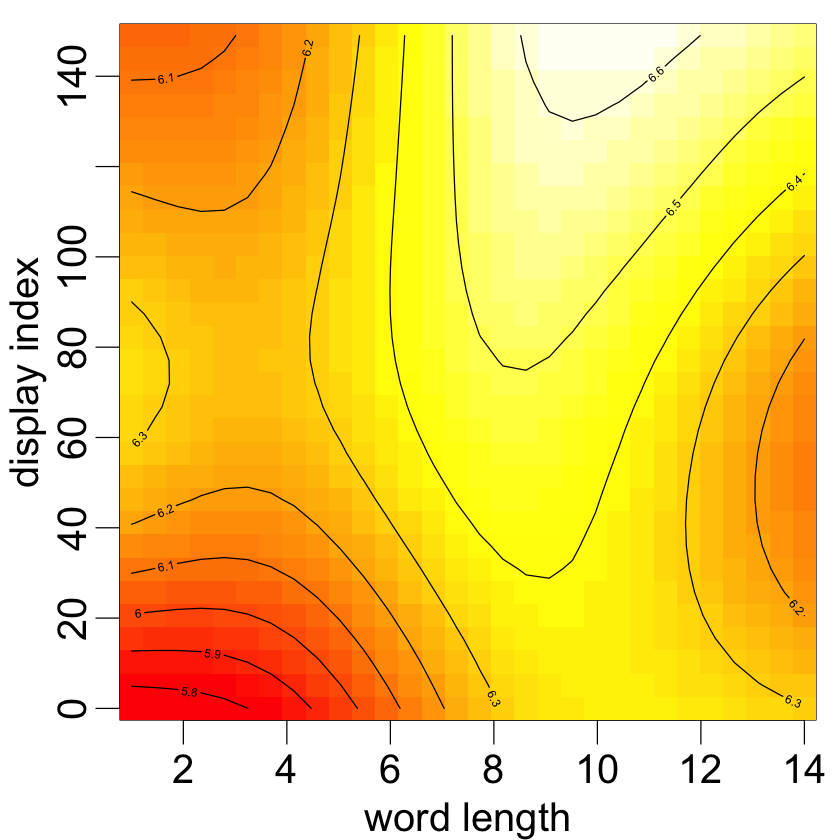

[1] "sentence_length"
[1] "display_index"
Summary:
	* capitalization : factor; set to the value(s): other. 
	* dependency_relation : factor; set to the value(s): root. 
	* saliency : numeric predictor; set to the value(s): 0.507935727055296. 
	* display_index : numeric predictor; with 30 values ranging from 0.000000 to 149.000000. 
	* word_length : numeric predictor; set to the value(s): 4. 
	* sentence_length : numeric predictor; with 30 values ranging from 1.000000 to 11.000000. 
	* relative_word_frequency : numeric predictor; set to the value(s): 8.30442783686542e-05. 
	* lemma_polarity : numeric predictor; set to the value(s): 0. 
	* normalized_saliency_rank : numeric predictor; set to the value(s): 0.636363636363636. 
	* word_position : numeric predictor; set to the value(s): 3. 
	* sentence_id : factor; set to the value(s): reviews-001325-0002. 
	* worker_id : factor; set to the value(s): 8cb2a64783a11131878e1cc3d8838ccd3fb7db330415ee0af6334dde3a603dc9. 


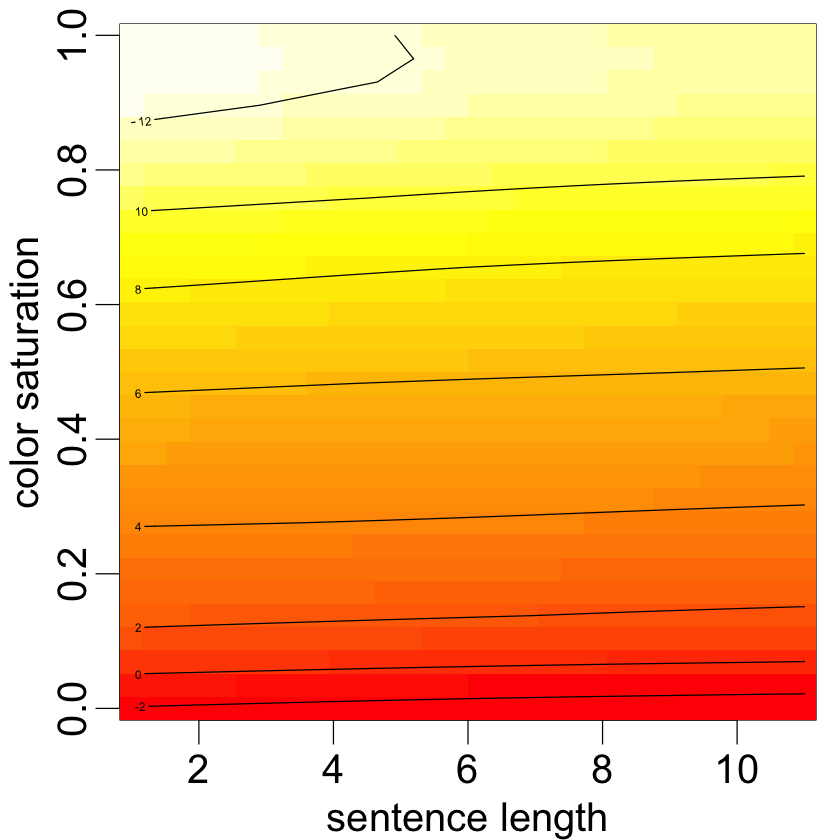

[1] "sentence_length"
[1] "word_length"
Summary:
	* capitalization : factor; set to the value(s): other. 
	* dependency_relation : factor; set to the value(s): root. 
	* saliency : numeric predictor; set to the value(s): 0.507935727055296. 
	* display_index : numeric predictor; set to the value(s): 75. 
	* word_length : numeric predictor; with 30 values ranging from 1.000000 to 14.000000. 
	* sentence_length : numeric predictor; with 30 values ranging from 1.000000 to 11.000000. 
	* relative_word_frequency : numeric predictor; set to the value(s): 8.30442783686542e-05. 
	* lemma_polarity : numeric predictor; set to the value(s): 0. 
	* normalized_saliency_rank : numeric predictor; set to the value(s): 0.636363636363636. 
	* word_position : numeric predictor; set to the value(s): 3. 
	* sentence_id : factor; set to the value(s): reviews-001325-0002. 
	* worker_id : factor; set to the value(s): 8cb2a64783a11131878e1cc3d8838ccd3fb7db330415ee0af6334dde3a603dc9. 


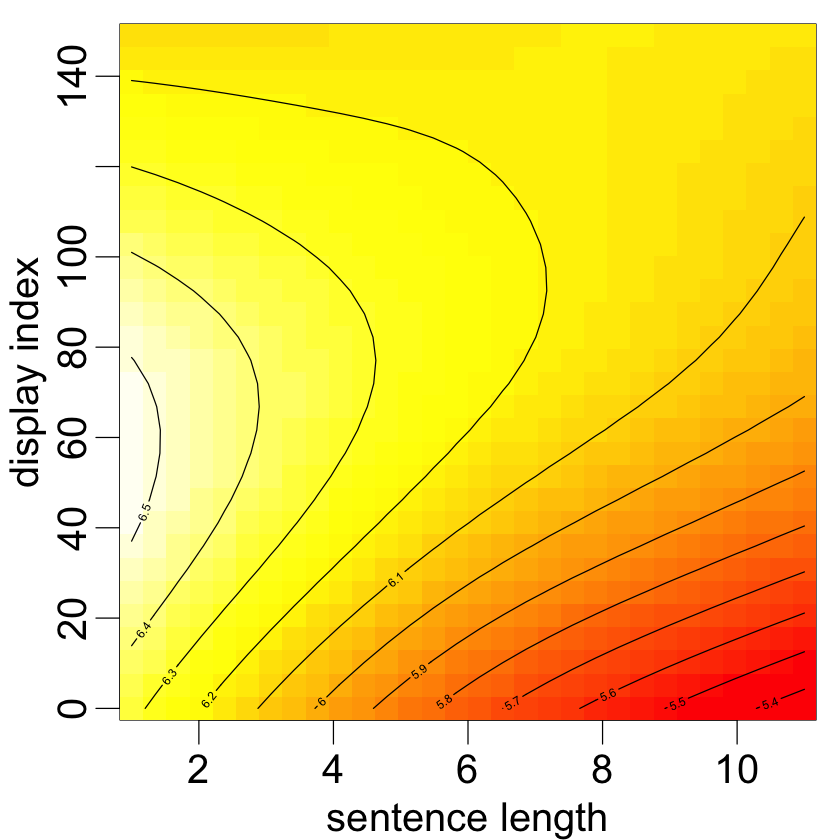

[1] "relative_word_frequency"
[1] "saliency"
Summary:
	* capitalization : factor; set to the value(s): other. 
	* dependency_relation : factor; set to the value(s): root. 
	* saliency : numeric predictor; with 30 values ranging from 0.000002 to 0.999604. 
	* display_index : numeric predictor; set to the value(s): 75. 
	* word_length : numeric predictor; set to the value(s): 4. 
	* sentence_length : numeric predictor; set to the value(s): 5. 
	* relative_word_frequency : numeric predictor; with 30 values ranging from 0.000000 to 0.133945. 
	* lemma_polarity : numeric predictor; set to the value(s): 0. 
	* normalized_saliency_rank : numeric predictor; set to the value(s): 0.636363636363636. 
	* word_position : numeric predictor; set to the value(s): 3. 
	* sentence_id : factor; set to the value(s): reviews-001325-0002. 
	* worker_id : factor; set to the value(s): 8cb2a64783a11131878e1cc3d8838ccd3fb7db330415ee0af6334dde3a603dc9. 


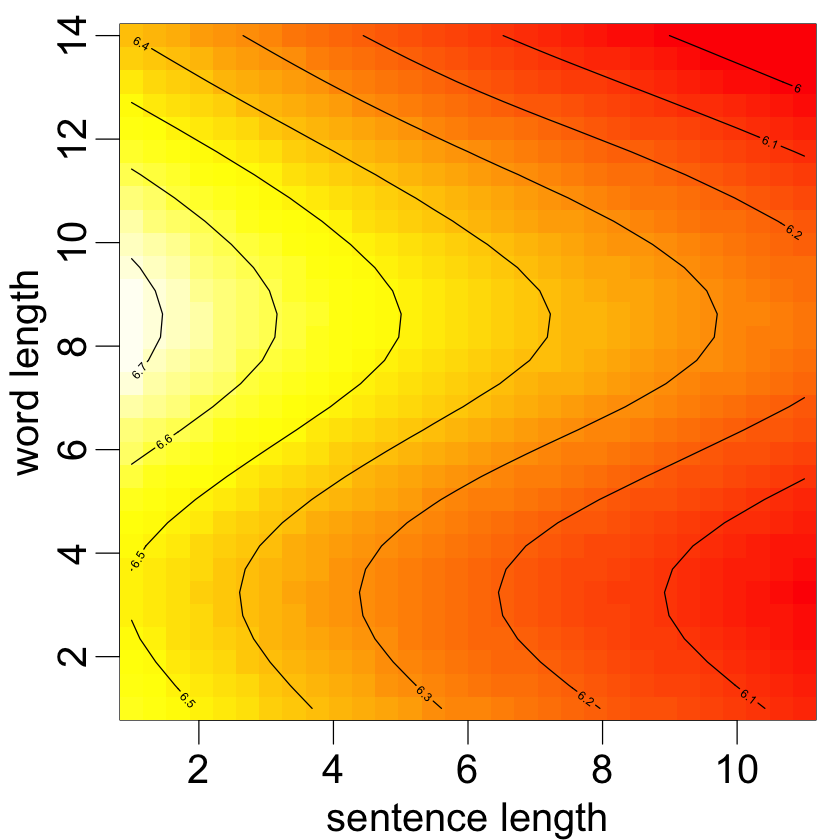

[1] "relative_word_frequency"
[1] "display_index"
Summary:
	* capitalization : factor; set to the value(s): other. 
	* dependency_relation : factor; set to the value(s): root. 
	* saliency : numeric predictor; set to the value(s): 0.507935727055296. 
	* display_index : numeric predictor; with 30 values ranging from 0.000000 to 149.000000. 
	* word_length : numeric predictor; set to the value(s): 4. 
	* sentence_length : numeric predictor; set to the value(s): 5. 
	* relative_word_frequency : numeric predictor; with 30 values ranging from 0.000000 to 0.133945. 
	* lemma_polarity : numeric predictor; set to the value(s): 0. 
	* normalized_saliency_rank : numeric predictor; set to the value(s): 0.636363636363636. 
	* word_position : numeric predictor; set to the value(s): 3. 
	* sentence_id : factor; set to the value(s): reviews-001325-0002. 
	* worker_id : factor; set to the value(s): 8cb2a64783a11131878e1cc3d8838ccd3fb7db330415ee0af6334dde3a603dc9. 


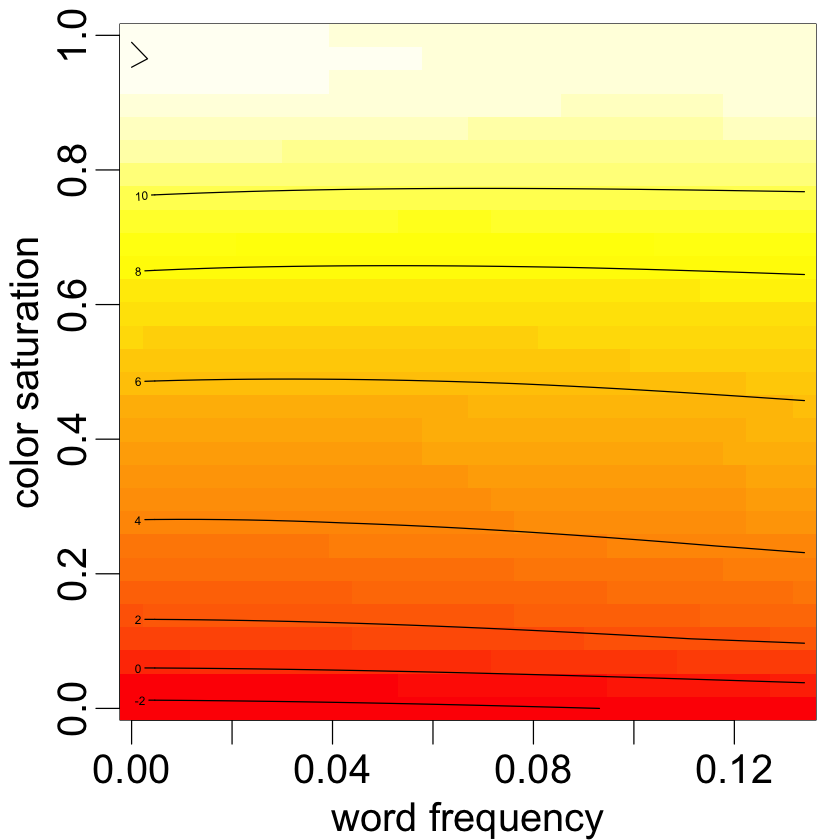

[1] "relative_word_frequency"
[1] "word_length"
Summary:
	* capitalization : factor; set to the value(s): other. 
	* dependency_relation : factor; set to the value(s): root. 
	* saliency : numeric predictor; set to the value(s): 0.507935727055296. 
	* display_index : numeric predictor; set to the value(s): 75. 
	* word_length : numeric predictor; with 30 values ranging from 1.000000 to 14.000000. 
	* sentence_length : numeric predictor; set to the value(s): 5. 
	* relative_word_frequency : numeric predictor; with 30 values ranging from 0.000000 to 0.133945. 
	* lemma_polarity : numeric predictor; set to the value(s): 0. 
	* normalized_saliency_rank : numeric predictor; set to the value(s): 0.636363636363636. 
	* word_position : numeric predictor; set to the value(s): 3. 
	* sentence_id : factor; set to the value(s): reviews-001325-0002. 
	* worker_id : factor; set to the value(s): 8cb2a64783a11131878e1cc3d8838ccd3fb7db330415ee0af6334dde3a603dc9. 


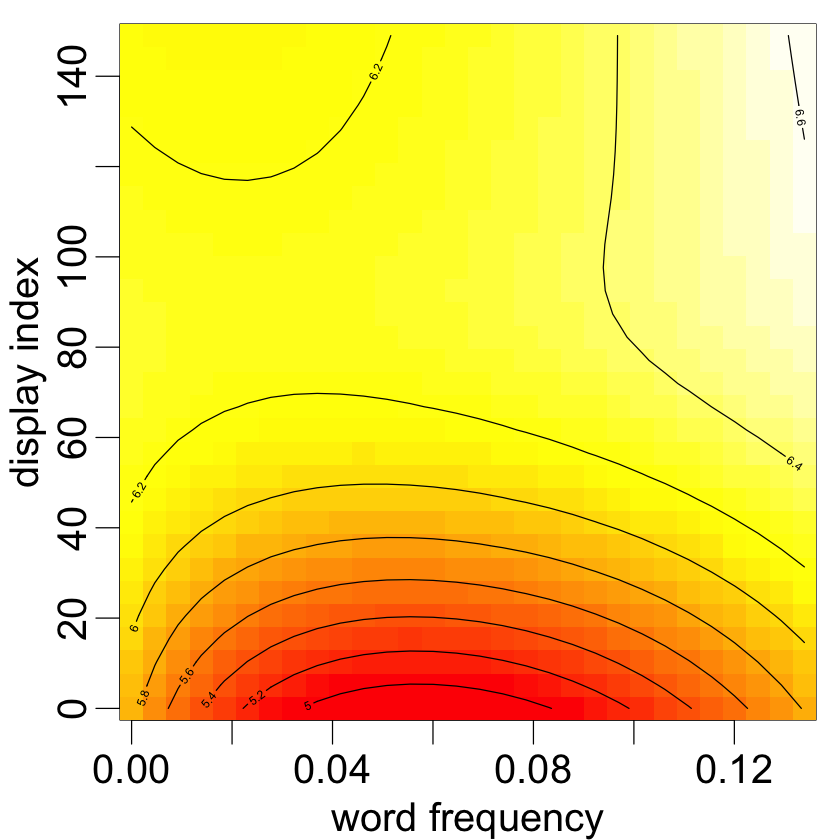

[1] "relative_word_frequency"
[1] "sentence_length"
Summary:
	* capitalization : factor; set to the value(s): other. 
	* dependency_relation : factor; set to the value(s): root. 
	* saliency : numeric predictor; set to the value(s): 0.507935727055296. 
	* display_index : numeric predictor; set to the value(s): 75. 
	* word_length : numeric predictor; set to the value(s): 4. 
	* sentence_length : numeric predictor; with 30 values ranging from 1.000000 to 11.000000. 
	* relative_word_frequency : numeric predictor; with 30 values ranging from 0.000000 to 0.133945. 
	* lemma_polarity : numeric predictor; set to the value(s): 0. 
	* normalized_saliency_rank : numeric predictor; set to the value(s): 0.636363636363636. 
	* word_position : numeric predictor; set to the value(s): 3. 
	* sentence_id : factor; set to the value(s): reviews-001325-0002. 
	* worker_id : factor; set to the value(s): 8cb2a64783a11131878e1cc3d8838ccd3fb7db330415ee0af6334dde3a603dc9. 


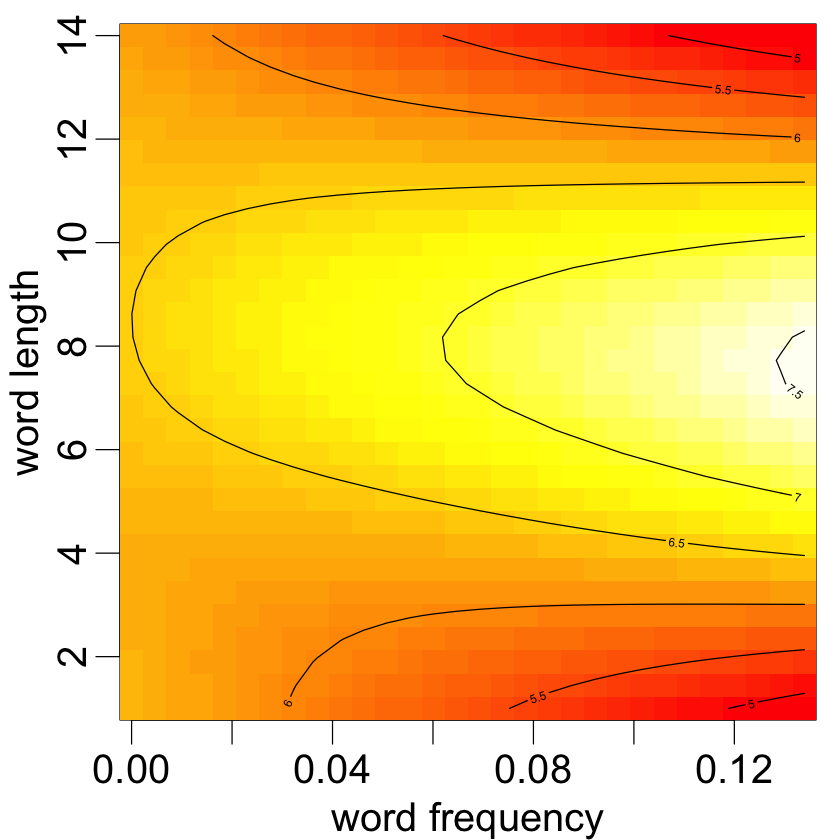

[1] "lemma_polarity"
[1] "saliency"
Summary:
	* capitalization : factor; set to the value(s): other. 
	* dependency_relation : factor; set to the value(s): root. 
	* saliency : numeric predictor; with 30 values ranging from 0.000002 to 0.999604. 
	* display_index : numeric predictor; set to the value(s): 75. 
	* word_length : numeric predictor; set to the value(s): 4. 
	* sentence_length : numeric predictor; set to the value(s): 5. 
	* relative_word_frequency : numeric predictor; set to the value(s): 8.30442783686542e-05. 
	* lemma_polarity : numeric predictor; with 30 values ranging from -0.826520 to 0.767580. 
	* normalized_saliency_rank : numeric predictor; set to the value(s): 0.636363636363636. 
	* word_position : numeric predictor; set to the value(s): 3. 
	* sentence_id : factor; set to the value(s): reviews-001325-0002. 
	* worker_id : factor; set to the value(s): 8cb2a64783a11131878e1cc3d8838ccd3fb7db330415ee0af6334dde3a603dc9. 


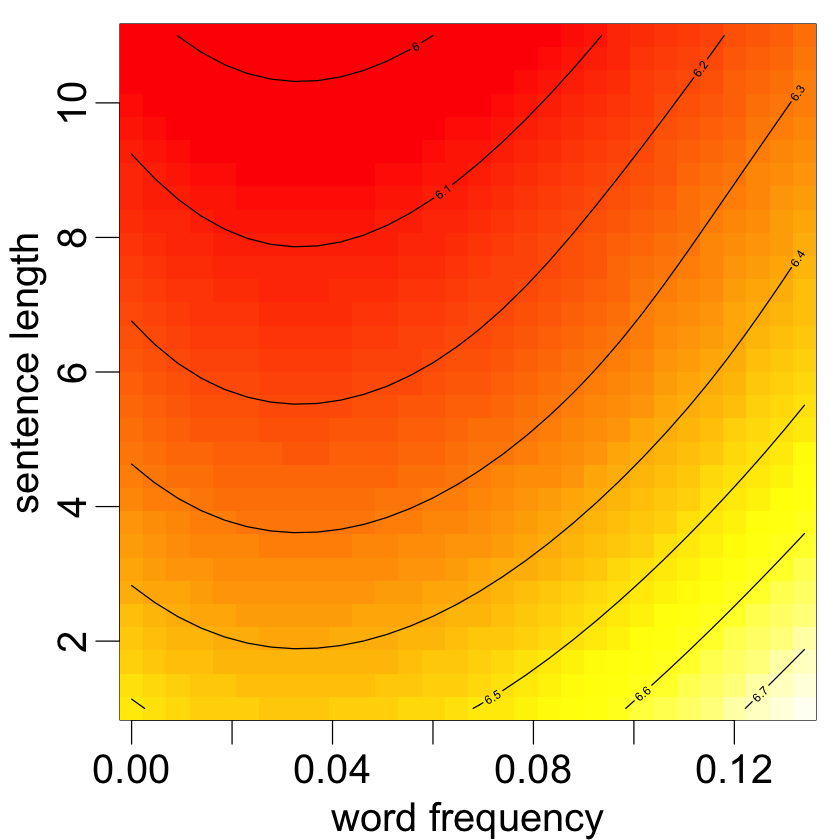

[1] "lemma_polarity"
[1] "display_index"
Summary:
	* capitalization : factor; set to the value(s): other. 
	* dependency_relation : factor; set to the value(s): root. 
	* saliency : numeric predictor; set to the value(s): 0.507935727055296. 
	* display_index : numeric predictor; with 30 values ranging from 0.000000 to 149.000000. 
	* word_length : numeric predictor; set to the value(s): 4. 
	* sentence_length : numeric predictor; set to the value(s): 5. 
	* relative_word_frequency : numeric predictor; set to the value(s): 8.30442783686542e-05. 
	* lemma_polarity : numeric predictor; with 30 values ranging from -0.826520 to 0.767580. 
	* normalized_saliency_rank : numeric predictor; set to the value(s): 0.636363636363636. 
	* word_position : numeric predictor; set to the value(s): 3. 
	* sentence_id : factor; set to the value(s): reviews-001325-0002. 
	* worker_id : factor; set to the value(s): 8cb2a64783a11131878e1cc3d8838ccd3fb7db330415ee0af6334dde3a603dc9. 


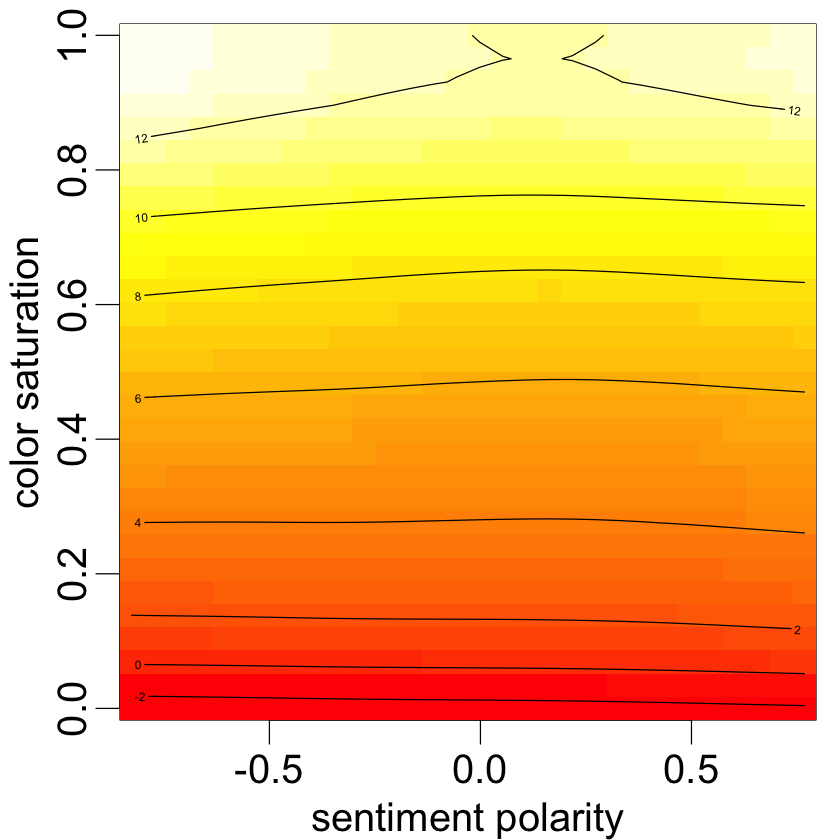

[1] "lemma_polarity"
[1] "word_length"
Summary:
	* capitalization : factor; set to the value(s): other. 
	* dependency_relation : factor; set to the value(s): root. 
	* saliency : numeric predictor; set to the value(s): 0.507935727055296. 
	* display_index : numeric predictor; set to the value(s): 75. 
	* word_length : numeric predictor; with 30 values ranging from 1.000000 to 14.000000. 
	* sentence_length : numeric predictor; set to the value(s): 5. 
	* relative_word_frequency : numeric predictor; set to the value(s): 8.30442783686542e-05. 
	* lemma_polarity : numeric predictor; with 30 values ranging from -0.826520 to 0.767580. 
	* normalized_saliency_rank : numeric predictor; set to the value(s): 0.636363636363636. 
	* word_position : numeric predictor; set to the value(s): 3. 
	* sentence_id : factor; set to the value(s): reviews-001325-0002. 
	* worker_id : factor; set to the value(s): 8cb2a64783a11131878e1cc3d8838ccd3fb7db330415ee0af6334dde3a603dc9. 


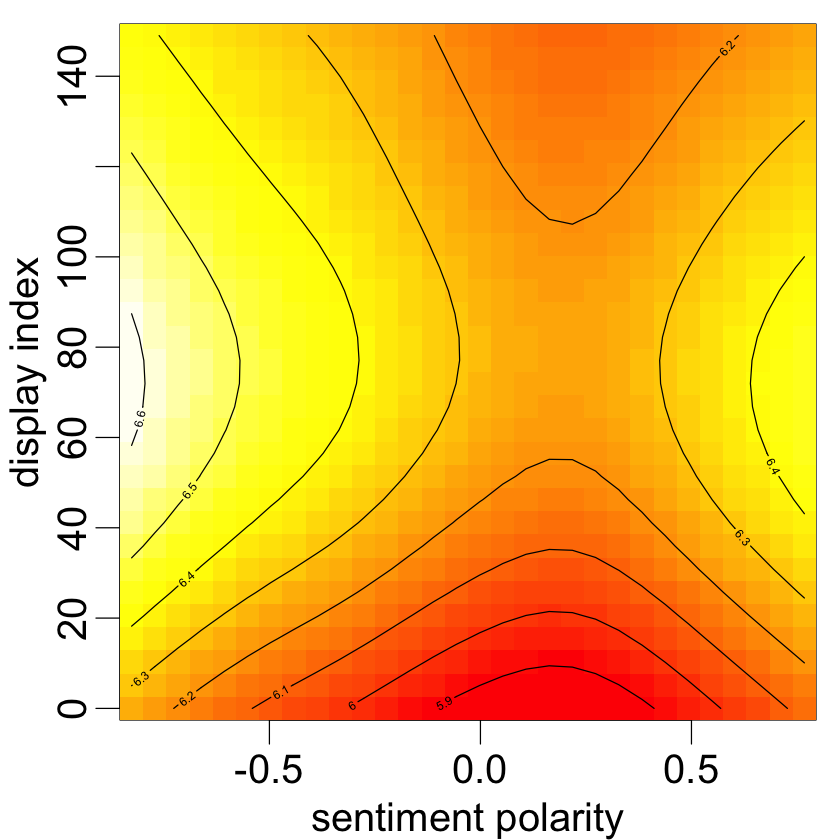

[1] "lemma_polarity"
[1] "sentence_length"
Summary:
	* capitalization : factor; set to the value(s): other. 
	* dependency_relation : factor; set to the value(s): root. 
	* saliency : numeric predictor; set to the value(s): 0.507935727055296. 
	* display_index : numeric predictor; set to the value(s): 75. 
	* word_length : numeric predictor; set to the value(s): 4. 
	* sentence_length : numeric predictor; with 30 values ranging from 1.000000 to 11.000000. 
	* relative_word_frequency : numeric predictor; set to the value(s): 8.30442783686542e-05. 
	* lemma_polarity : numeric predictor; with 30 values ranging from -0.826520 to 0.767580. 
	* normalized_saliency_rank : numeric predictor; set to the value(s): 0.636363636363636. 
	* word_position : numeric predictor; set to the value(s): 3. 
	* sentence_id : factor; set to the value(s): reviews-001325-0002. 
	* worker_id : factor; set to the value(s): 8cb2a64783a11131878e1cc3d8838ccd3fb7db330415ee0af6334dde3a603dc9. 


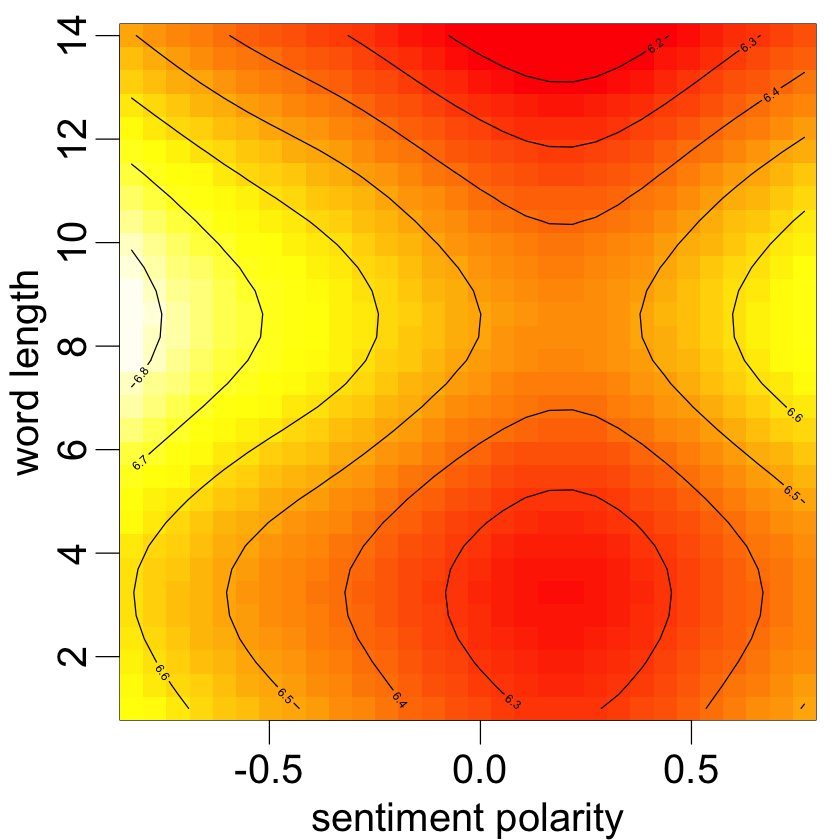

[1] "lemma_polarity"
[1] "relative_word_frequency"
Summary:
	* capitalization : factor; set to the value(s): other. 
	* dependency_relation : factor; set to the value(s): root. 
	* saliency : numeric predictor; set to the value(s): 0.507935727055296. 
	* display_index : numeric predictor; set to the value(s): 75. 
	* word_length : numeric predictor; set to the value(s): 4. 
	* sentence_length : numeric predictor; set to the value(s): 5. 
	* relative_word_frequency : numeric predictor; with 30 values ranging from 0.000000 to 0.133945. 
	* lemma_polarity : numeric predictor; with 30 values ranging from -0.826520 to 0.767580. 
	* normalized_saliency_rank : numeric predictor; set to the value(s): 0.636363636363636. 
	* word_position : numeric predictor; set to the value(s): 3. 
	* sentence_id : factor; set to the value(s): reviews-001325-0002. 
	* worker_id : factor; set to the value(s): 8cb2a64783a11131878e1cc3d8838ccd3fb7db330415ee0af6334dde3a603dc9. 


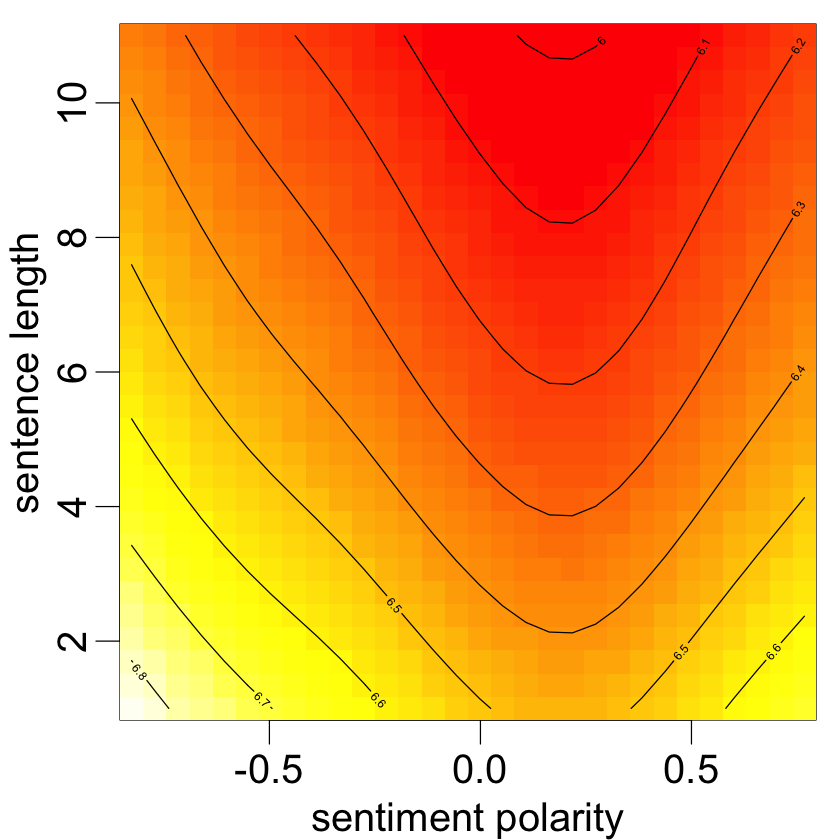

[1] "normalized_saliency_rank"
[1] "saliency"
Summary:
	* capitalization : factor; set to the value(s): other. 
	* dependency_relation : factor; set to the value(s): root. 
	* saliency : numeric predictor; with 30 values ranging from 0.000002 to 0.999604. 
	* display_index : numeric predictor; set to the value(s): 75. 
	* word_length : numeric predictor; set to the value(s): 4. 
	* sentence_length : numeric predictor; set to the value(s): 5. 
	* relative_word_frequency : numeric predictor; set to the value(s): 8.30442783686542e-05. 
	* lemma_polarity : numeric predictor; set to the value(s): 0. 
	* normalized_saliency_rank : numeric predictor; with 30 values ranging from 0.090909 to 1.000000. 
	* word_position : numeric predictor; set to the value(s): 3. 
	* sentence_id : factor; set to the value(s): reviews-001325-0002. 
	* worker_id : factor; set to the value(s): 8cb2a64783a11131878e1cc3d8838ccd3fb7db330415ee0af6334dde3a603dc9. 


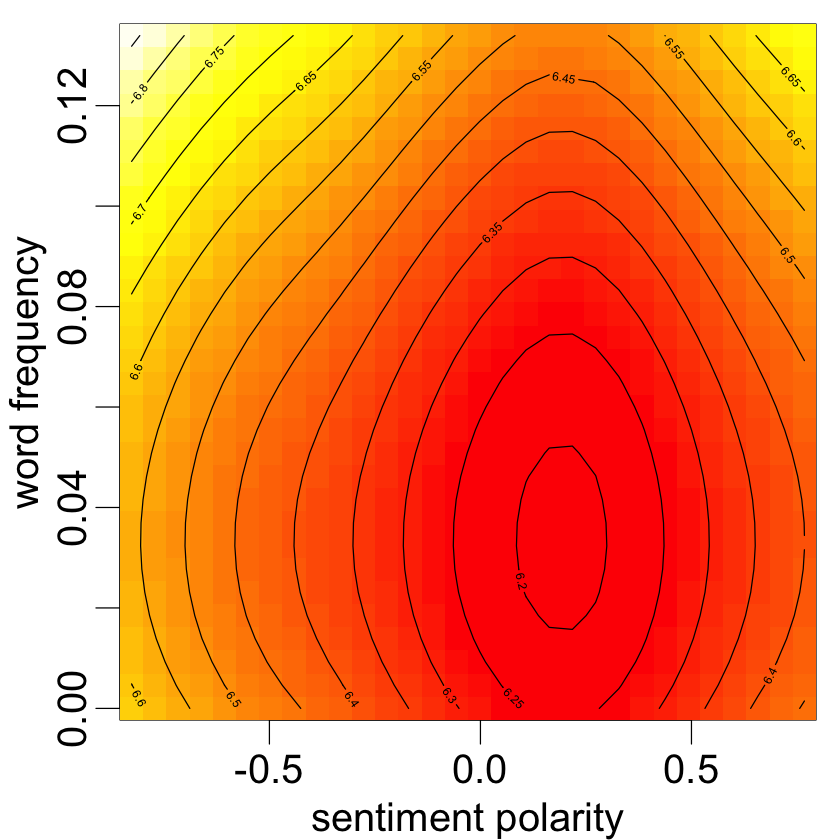

[1] "normalized_saliency_rank"
[1] "display_index"
Summary:
	* capitalization : factor; set to the value(s): other. 
	* dependency_relation : factor; set to the value(s): root. 
	* saliency : numeric predictor; set to the value(s): 0.507935727055296. 
	* display_index : numeric predictor; with 30 values ranging from 0.000000 to 149.000000. 
	* word_length : numeric predictor; set to the value(s): 4. 
	* sentence_length : numeric predictor; set to the value(s): 5. 
	* relative_word_frequency : numeric predictor; set to the value(s): 8.30442783686542e-05. 
	* lemma_polarity : numeric predictor; set to the value(s): 0. 
	* normalized_saliency_rank : numeric predictor; with 30 values ranging from 0.090909 to 1.000000. 
	* word_position : numeric predictor; set to the value(s): 3. 
	* sentence_id : factor; set to the value(s): reviews-001325-0002. 
	* worker_id : factor; set to the value(s): 8cb2a64783a11131878e1cc3d8838ccd3fb7db330415ee0af6334dde3a603dc9. 


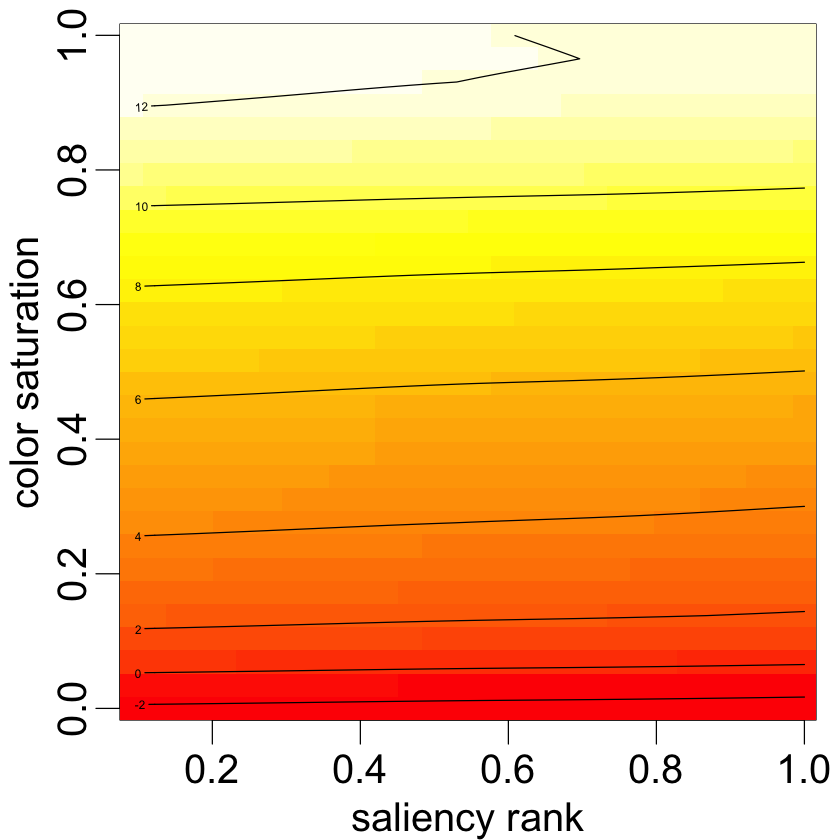

[1] "normalized_saliency_rank"
[1] "word_length"
Summary:
	* capitalization : factor; set to the value(s): other. 
	* dependency_relation : factor; set to the value(s): root. 
	* saliency : numeric predictor; set to the value(s): 0.507935727055296. 
	* display_index : numeric predictor; set to the value(s): 75. 
	* word_length : numeric predictor; with 30 values ranging from 1.000000 to 14.000000. 
	* sentence_length : numeric predictor; set to the value(s): 5. 
	* relative_word_frequency : numeric predictor; set to the value(s): 8.30442783686542e-05. 
	* lemma_polarity : numeric predictor; set to the value(s): 0. 
	* normalized_saliency_rank : numeric predictor; with 30 values ranging from 0.090909 to 1.000000. 
	* word_position : numeric predictor; set to the value(s): 3. 
	* sentence_id : factor; set to the value(s): reviews-001325-0002. 
	* worker_id : factor; set to the value(s): 8cb2a64783a11131878e1cc3d8838ccd3fb7db330415ee0af6334dde3a603dc9. 


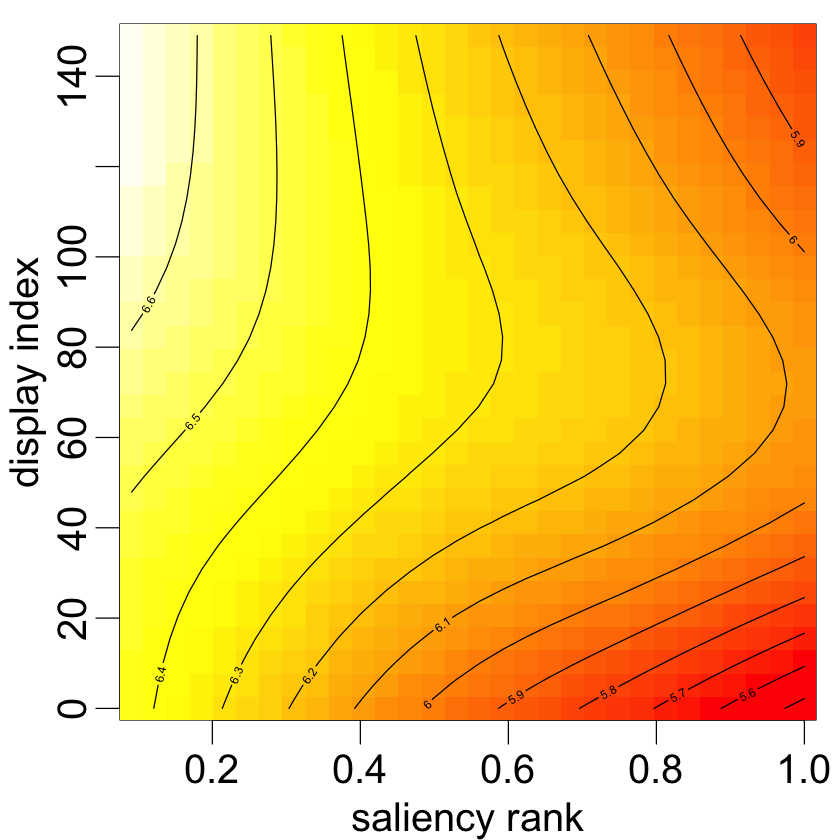

[1] "normalized_saliency_rank"
[1] "sentence_length"
Summary:
	* capitalization : factor; set to the value(s): other. 
	* dependency_relation : factor; set to the value(s): root. 
	* saliency : numeric predictor; set to the value(s): 0.507935727055296. 
	* display_index : numeric predictor; set to the value(s): 75. 
	* word_length : numeric predictor; set to the value(s): 4. 
	* sentence_length : numeric predictor; with 30 values ranging from 1.000000 to 11.000000. 
	* relative_word_frequency : numeric predictor; set to the value(s): 8.30442783686542e-05. 
	* lemma_polarity : numeric predictor; set to the value(s): 0. 
	* normalized_saliency_rank : numeric predictor; with 30 values ranging from 0.090909 to 1.000000. 
	* word_position : numeric predictor; set to the value(s): 3. 
	* sentence_id : factor; set to the value(s): reviews-001325-0002. 
	* worker_id : factor; set to the value(s): 8cb2a64783a11131878e1cc3d8838ccd3fb7db330415ee0af6334dde3a603dc9. 


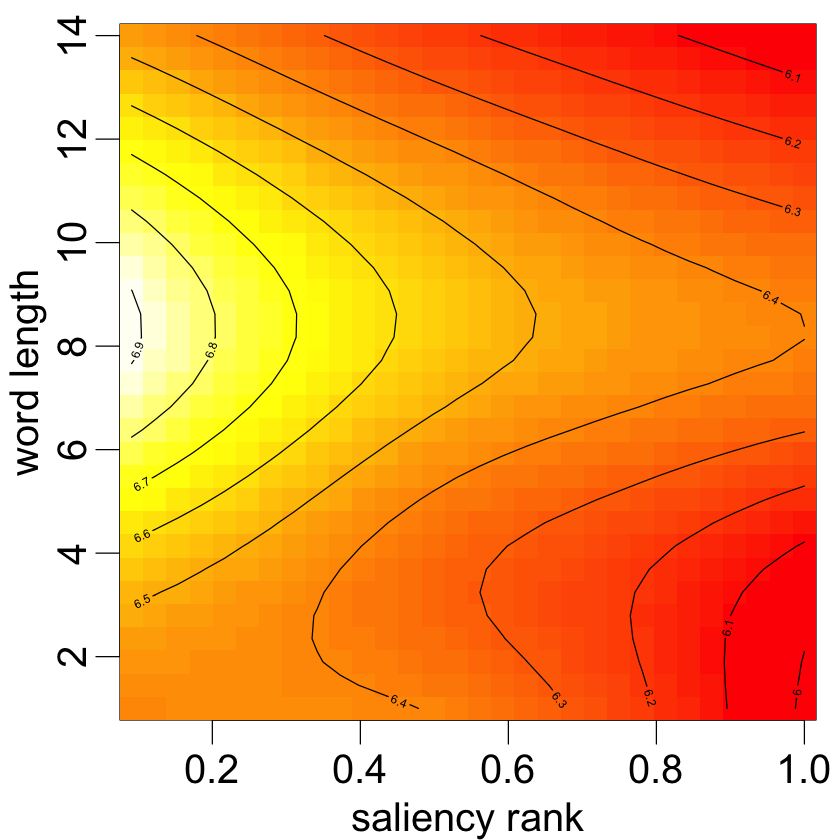

[1] "normalized_saliency_rank"
[1] "relative_word_frequency"
Summary:
	* capitalization : factor; set to the value(s): other. 
	* dependency_relation : factor; set to the value(s): root. 
	* saliency : numeric predictor; set to the value(s): 0.507935727055296. 
	* display_index : numeric predictor; set to the value(s): 75. 
	* word_length : numeric predictor; set to the value(s): 4. 
	* sentence_length : numeric predictor; set to the value(s): 5. 
	* relative_word_frequency : numeric predictor; with 30 values ranging from 0.000000 to 0.133945. 
	* lemma_polarity : numeric predictor; set to the value(s): 0. 
	* normalized_saliency_rank : numeric predictor; with 30 values ranging from 0.090909 to 1.000000. 
	* word_position : numeric predictor; set to the value(s): 3. 
	* sentence_id : factor; set to the value(s): reviews-001325-0002. 
	* worker_id : factor; set to the value(s): 8cb2a64783a11131878e1cc3d8838ccd3fb7db330415ee0af6334dde3a603dc9. 


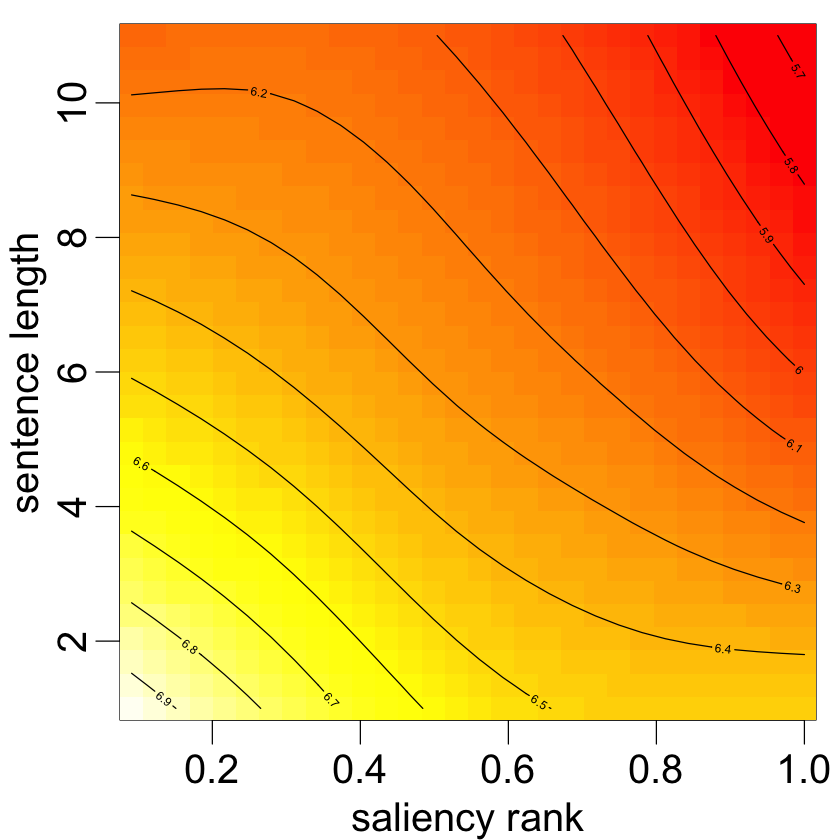

[1] "normalized_saliency_rank"
[1] "lemma_polarity"
Summary:
	* capitalization : factor; set to the value(s): other. 
	* dependency_relation : factor; set to the value(s): root. 
	* saliency : numeric predictor; set to the value(s): 0.507935727055296. 
	* display_index : numeric predictor; set to the value(s): 75. 
	* word_length : numeric predictor; set to the value(s): 4. 
	* sentence_length : numeric predictor; set to the value(s): 5. 
	* relative_word_frequency : numeric predictor; set to the value(s): 8.30442783686542e-05. 
	* lemma_polarity : numeric predictor; with 30 values ranging from -0.826520 to 0.767580. 
	* normalized_saliency_rank : numeric predictor; with 30 values ranging from 0.090909 to 1.000000. 
	* word_position : numeric predictor; set to the value(s): 3. 
	* sentence_id : factor; set to the value(s): reviews-001325-0002. 
	* worker_id : factor; set to the value(s): 8cb2a64783a11131878e1cc3d8838ccd3fb7db330415ee0af6334dde3a603dc9. 


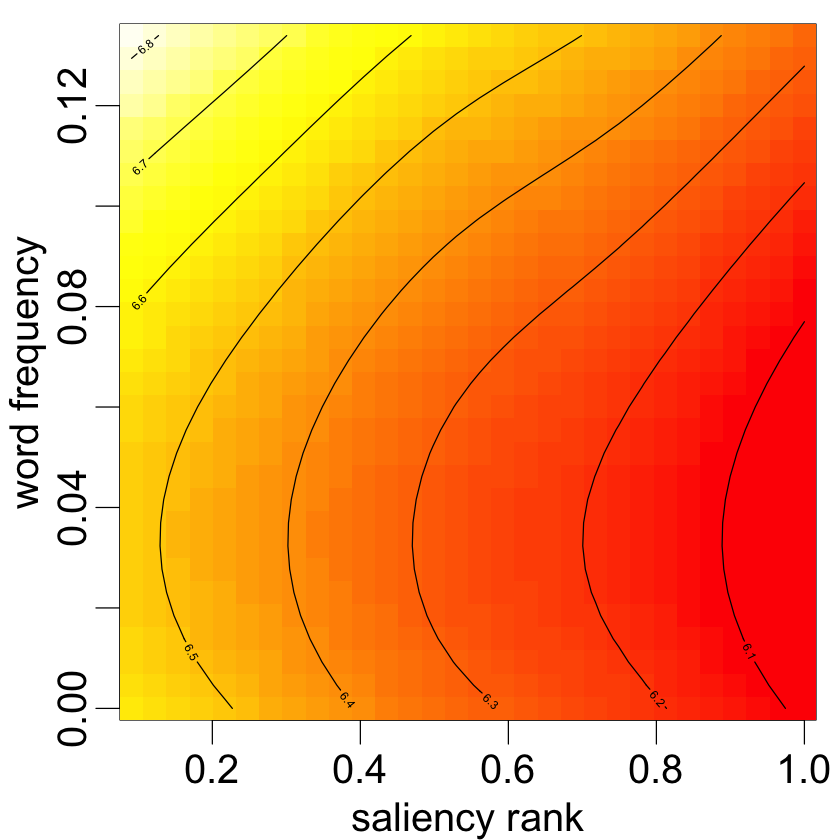

[1] "word_position"
[1] "saliency"
Summary:
	* capitalization : factor; set to the value(s): other. 
	* dependency_relation : factor; set to the value(s): root. 
	* saliency : numeric predictor; with 30 values ranging from 0.000002 to 0.999604. 
	* display_index : numeric predictor; set to the value(s): 75. 
	* word_length : numeric predictor; set to the value(s): 4. 
	* sentence_length : numeric predictor; set to the value(s): 5. 
	* relative_word_frequency : numeric predictor; set to the value(s): 8.30442783686542e-05. 
	* lemma_polarity : numeric predictor; set to the value(s): 0. 
	* normalized_saliency_rank : numeric predictor; set to the value(s): 0.636363636363636. 
	* word_position : numeric predictor; with 30 values ranging from 1.000000 to 11.000000. 
	* sentence_id : factor; set to the value(s): reviews-001325-0002. 
	* worker_id : factor; set to the value(s): 8cb2a64783a11131878e1cc3d8838ccd3fb7db330415ee0af6334dde3a603dc9. 


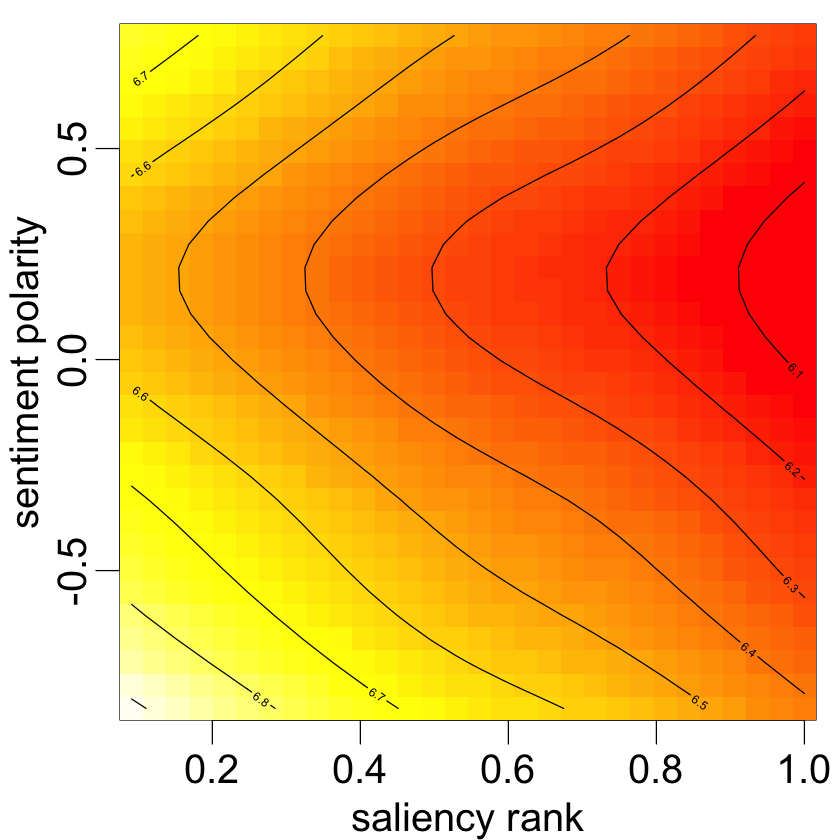

[1] "word_position"
[1] "display_index"
Summary:
	* capitalization : factor; set to the value(s): other. 
	* dependency_relation : factor; set to the value(s): root. 
	* saliency : numeric predictor; set to the value(s): 0.507935727055296. 
	* display_index : numeric predictor; with 30 values ranging from 0.000000 to 149.000000. 
	* word_length : numeric predictor; set to the value(s): 4. 
	* sentence_length : numeric predictor; set to the value(s): 5. 
	* relative_word_frequency : numeric predictor; set to the value(s): 8.30442783686542e-05. 
	* lemma_polarity : numeric predictor; set to the value(s): 0. 
	* normalized_saliency_rank : numeric predictor; set to the value(s): 0.636363636363636. 
	* word_position : numeric predictor; with 30 values ranging from 1.000000 to 11.000000. 
	* sentence_id : factor; set to the value(s): reviews-001325-0002. 
	* worker_id : factor; set to the value(s): 8cb2a64783a11131878e1cc3d8838ccd3fb7db330415ee0af6334dde3a603dc9. 


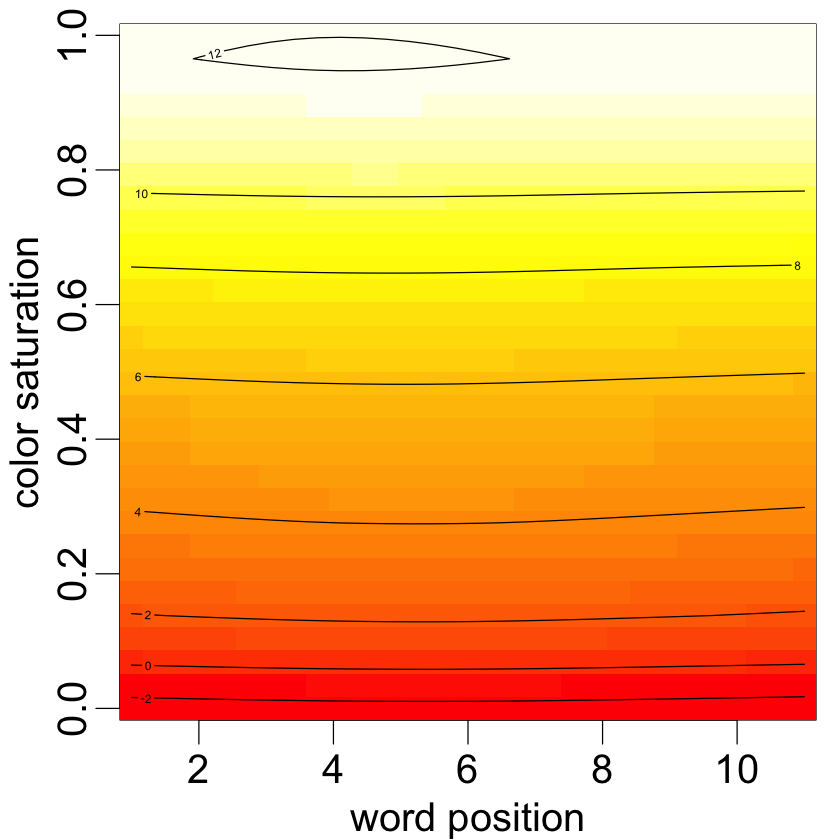

[1] "word_position"
[1] "word_length"
Summary:
	* capitalization : factor; set to the value(s): other. 
	* dependency_relation : factor; set to the value(s): root. 
	* saliency : numeric predictor; set to the value(s): 0.507935727055296. 
	* display_index : numeric predictor; set to the value(s): 75. 
	* word_length : numeric predictor; with 30 values ranging from 1.000000 to 14.000000. 
	* sentence_length : numeric predictor; set to the value(s): 5. 
	* relative_word_frequency : numeric predictor; set to the value(s): 8.30442783686542e-05. 
	* lemma_polarity : numeric predictor; set to the value(s): 0. 
	* normalized_saliency_rank : numeric predictor; set to the value(s): 0.636363636363636. 
	* word_position : numeric predictor; with 30 values ranging from 1.000000 to 11.000000. 
	* sentence_id : factor; set to the value(s): reviews-001325-0002. 
	* worker_id : factor; set to the value(s): 8cb2a64783a11131878e1cc3d8838ccd3fb7db330415ee0af6334dde3a603dc9. 


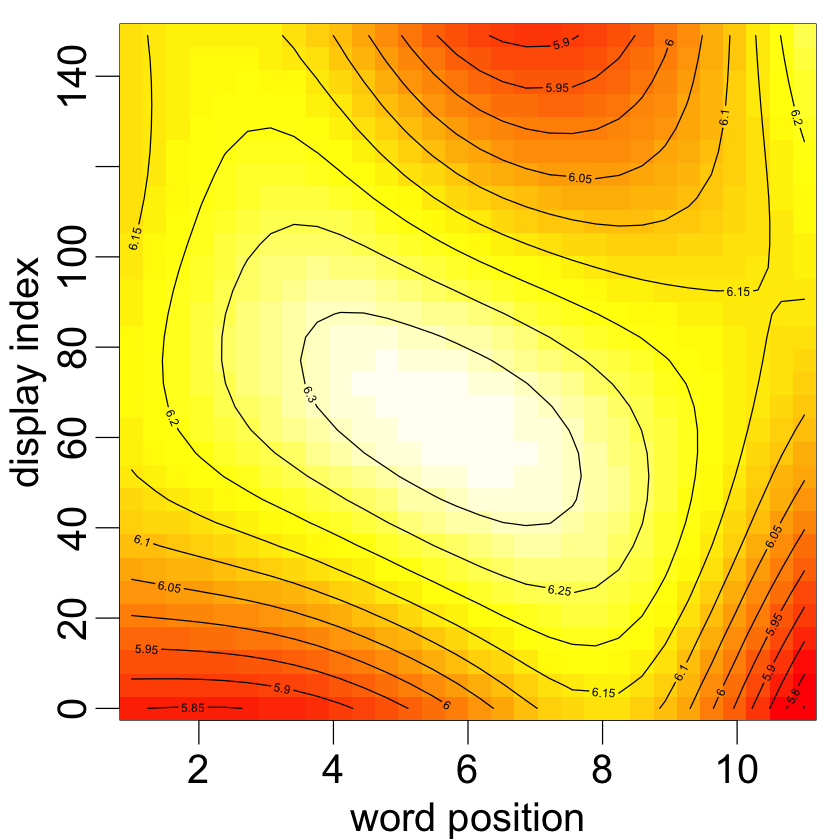

[1] "word_position"
[1] "sentence_length"
Summary:
	* capitalization : factor; set to the value(s): other. 
	* dependency_relation : factor; set to the value(s): root. 
	* saliency : numeric predictor; set to the value(s): 0.507935727055296. 
	* display_index : numeric predictor; set to the value(s): 75. 
	* word_length : numeric predictor; set to the value(s): 4. 
	* sentence_length : numeric predictor; with 30 values ranging from 1.000000 to 11.000000. 
	* relative_word_frequency : numeric predictor; set to the value(s): 8.30442783686542e-05. 
	* lemma_polarity : numeric predictor; set to the value(s): 0. 
	* normalized_saliency_rank : numeric predictor; set to the value(s): 0.636363636363636. 
	* word_position : numeric predictor; with 30 values ranging from 1.000000 to 11.000000. 
	* sentence_id : factor; set to the value(s): reviews-001325-0002. 
	* worker_id : factor; set to the value(s): 8cb2a64783a11131878e1cc3d8838ccd3fb7db330415ee0af6334dde3a603dc9. 


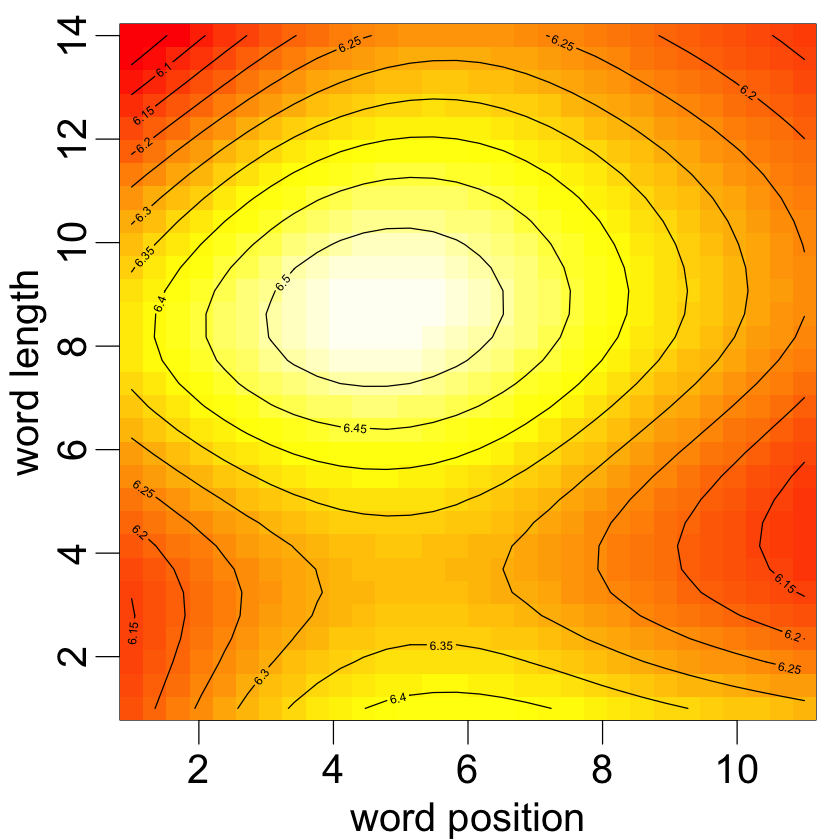

[1] "word_position"
[1] "relative_word_frequency"
Summary:
	* capitalization : factor; set to the value(s): other. 
	* dependency_relation : factor; set to the value(s): root. 
	* saliency : numeric predictor; set to the value(s): 0.507935727055296. 
	* display_index : numeric predictor; set to the value(s): 75. 
	* word_length : numeric predictor; set to the value(s): 4. 
	* sentence_length : numeric predictor; set to the value(s): 5. 
	* relative_word_frequency : numeric predictor; with 30 values ranging from 0.000000 to 0.133945. 
	* lemma_polarity : numeric predictor; set to the value(s): 0. 
	* normalized_saliency_rank : numeric predictor; set to the value(s): 0.636363636363636. 
	* word_position : numeric predictor; with 30 values ranging from 1.000000 to 11.000000. 
	* sentence_id : factor; set to the value(s): reviews-001325-0002. 
	* worker_id : factor; set to the value(s): 8cb2a64783a11131878e1cc3d8838ccd3fb7db330415ee0af6334dde3a603dc9. 


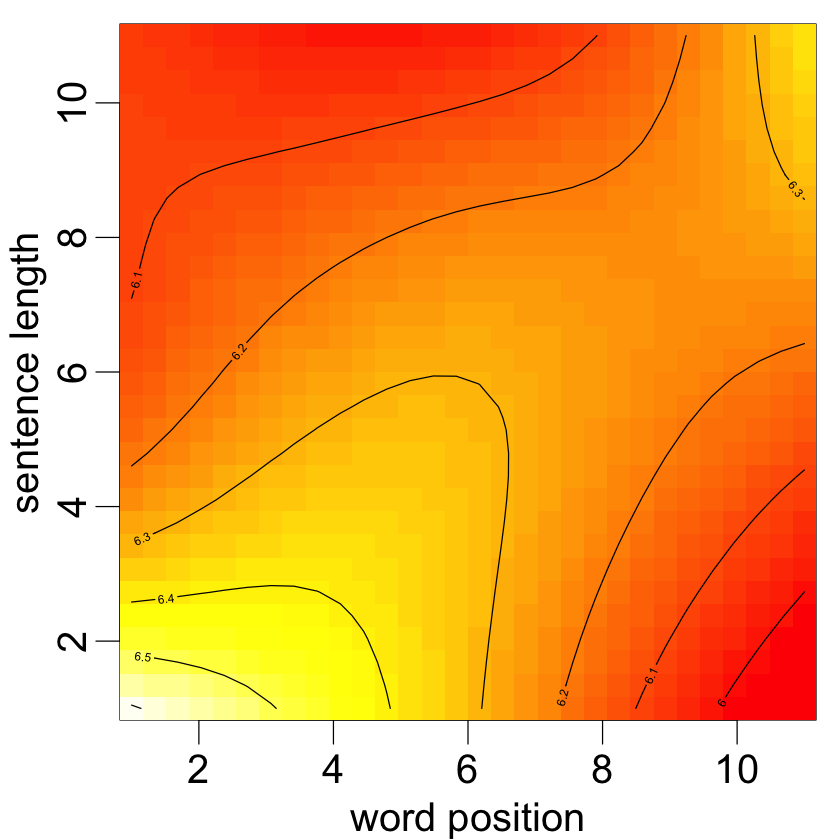

[1] "word_position"
[1] "lemma_polarity"
Summary:
	* capitalization : factor; set to the value(s): other. 
	* dependency_relation : factor; set to the value(s): root. 
	* saliency : numeric predictor; set to the value(s): 0.507935727055296. 
	* display_index : numeric predictor; set to the value(s): 75. 
	* word_length : numeric predictor; set to the value(s): 4. 
	* sentence_length : numeric predictor; set to the value(s): 5. 
	* relative_word_frequency : numeric predictor; set to the value(s): 8.30442783686542e-05. 
	* lemma_polarity : numeric predictor; with 30 values ranging from -0.826520 to 0.767580. 
	* normalized_saliency_rank : numeric predictor; set to the value(s): 0.636363636363636. 
	* word_position : numeric predictor; with 30 values ranging from 1.000000 to 11.000000. 
	* sentence_id : factor; set to the value(s): reviews-001325-0002. 
	* worker_id : factor; set to the value(s): 8cb2a64783a11131878e1cc3d8838ccd3fb7db330415ee0af6334dde3a603dc9. 


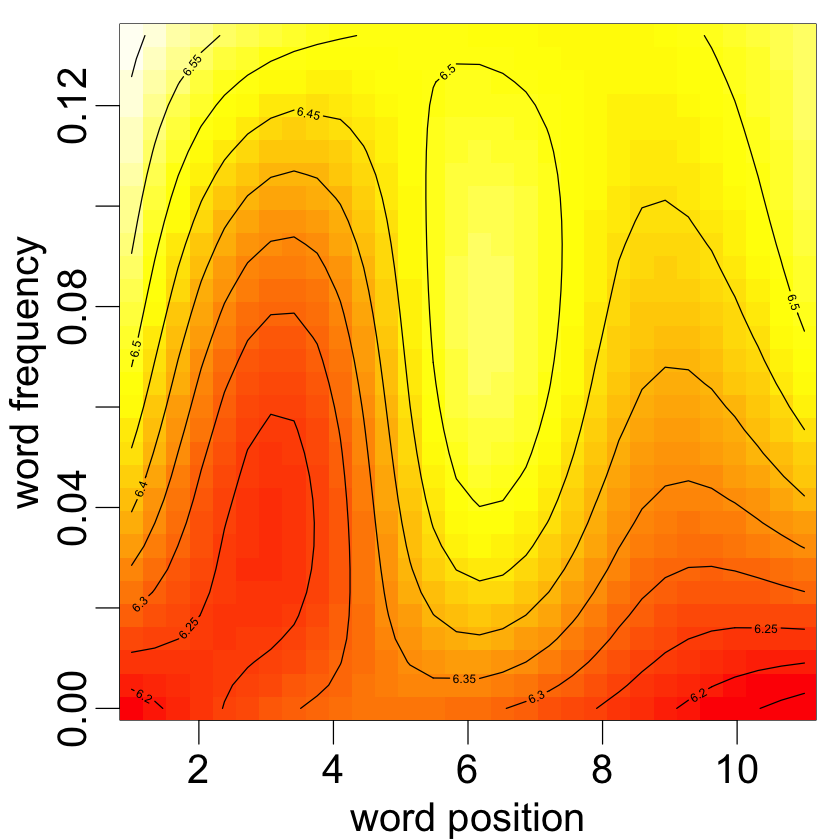

[1] "word_position"
[1] "normalized_saliency_rank"
Summary:
	* capitalization : factor; set to the value(s): other. 
	* dependency_relation : factor; set to the value(s): root. 
	* saliency : numeric predictor; set to the value(s): 0.507935727055296. 
	* display_index : numeric predictor; set to the value(s): 75. 
	* word_length : numeric predictor; set to the value(s): 4. 
	* sentence_length : numeric predictor; set to the value(s): 5. 
	* relative_word_frequency : numeric predictor; set to the value(s): 8.30442783686542e-05. 
	* lemma_polarity : numeric predictor; set to the value(s): 0. 
	* normalized_saliency_rank : numeric predictor; with 30 values ranging from 0.090909 to 1.000000. 
	* word_position : numeric predictor; with 30 values ranging from 1.000000 to 11.000000. 
	* sentence_id : factor; set to the value(s): reviews-001325-0002. 
	* worker_id : factor; set to the value(s): 8cb2a64783a11131878e1cc3d8838ccd3fb7db330415ee0af6334dde3a603dc9. 


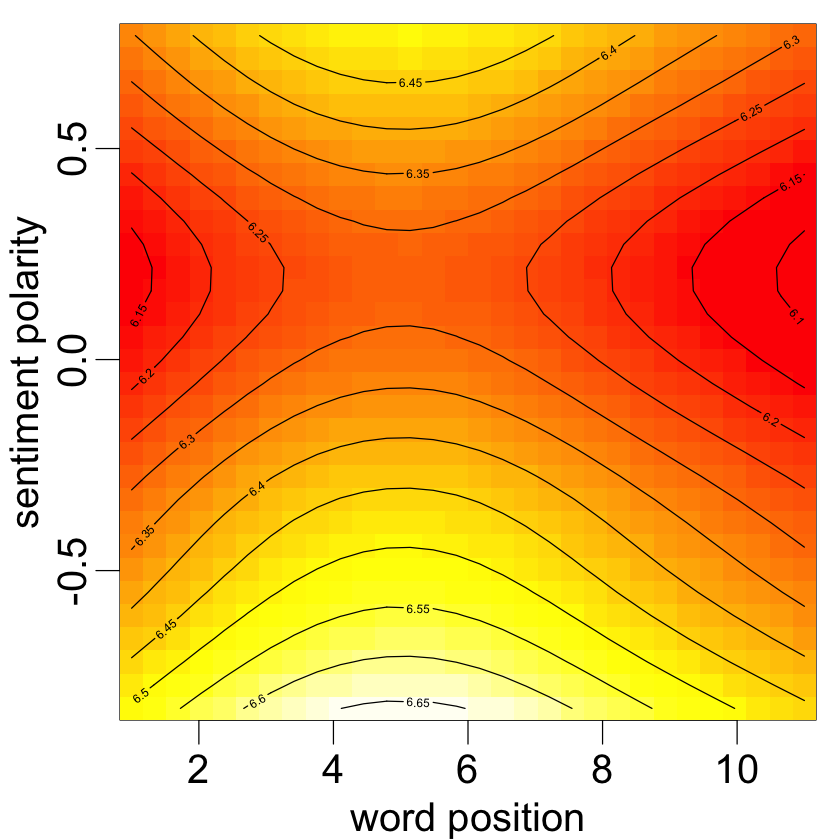

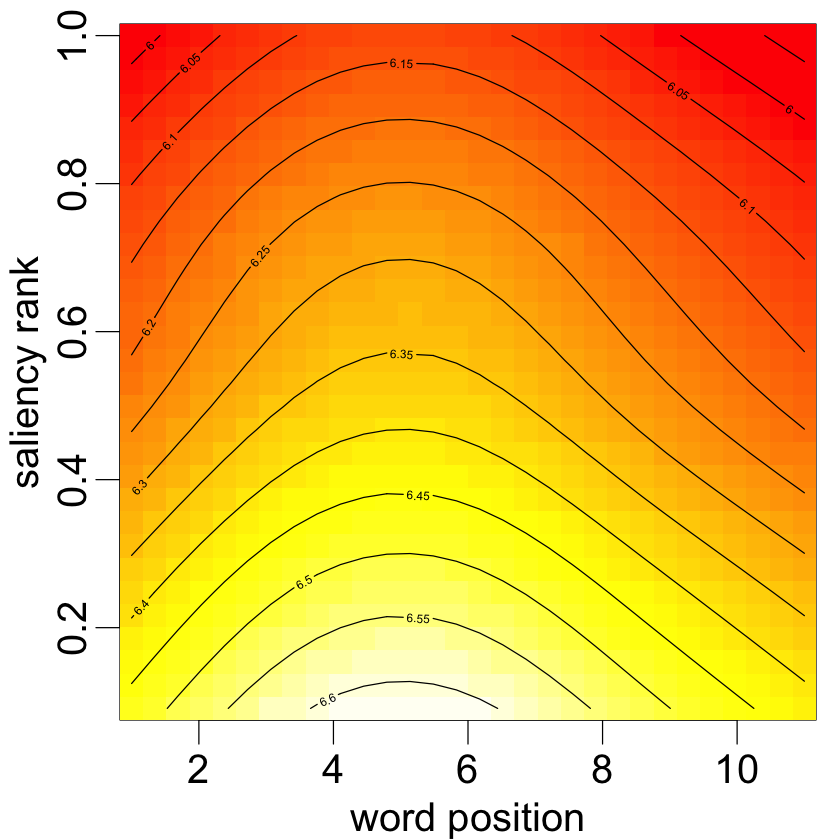

In [11]:
smooth_term_names <- c()
for (i in 1:length(all_plots)) {
    tmp_name <- all_plots[[i]]$ylab
    if (grepl("s(", tmp_name, fixed=TRUE)){
        smooth_term_names <- append(smooth_term_names, c(str_replace(str_replace(str_split(tmp_name, ",")[[1]][[1]], "\\(", "_"), "s_", "")))
    }
}

for (i in 1:length(smooth_term_names)) {
    for (j in 1:i) {
        if (i!=j){
            print(smooth_term_names[i])
            print(smooth_term_names[j])
            par(mar = c(2.5, 2.5, 0.5, 0.5),
                cex=2.0,
                mgp=c(1.5,0.5,0))
            interaction_plot_1 <- fvisgam(model,
                                          view=c(smooth_term_names[i], smooth_term_names[j]),
                                          cond=list(worker_id=c("8cb2a64783a11131878e1cc3d8838ccd3fb7db330415ee0af6334dde3a603dc9")), # arbitrary worker ID
                                          rm.ranef=FALSE,
                                          color="heat",
                                          print.summary=TRUE,
                                          add.color.legend = FALSE,
                                          hide.label = TRUE,
                                          main="",
                                          xlab = covariates2plottitles[[smooth_term_names[i]]],
                                          ylab = covariates2plottitles[[smooth_term_names[j]]]
                    )
        }
    }
}

